# P2 : Concevoir une application au service de la santé publique - Nettoyage des données

## <a name="C2">Présentation du projet
    
<a name="C1">Objectif :</a> Répondre à l'appel à projet de Santé publique France, en proposant une idée d'application innovante en lien avec l'alimentation et la santé, en se basant sur l'analyse de la base de données "Open Food Facts".

<a name="C1">Contexte :</a> "Open Food Facts" est un projet collaboratif qui a pour but de réunir, dans une base de données en libre accès, le maximum d'informations concernant les produits alimentaires grand publique. Ce projet est géré par une association à but non lucratif, et la base de données est alimentée par tous les utilisateurs de l'application associée. Les informations sont obtenues par scan du code barre du produit alimentaire.

## <a name="C1">Proposition :

Le jeux de données est très riches avec des informations très variées :

- Composition des produits (ingrédients, teneur en nutriments...)
- valeurs énergétiques
- catégories d'aliment
- parcour de vie du produit : du lieu de fabrication au lieu de consommation
- présence d'allergènes
- marque et  et packaging
- Nutiscore

De nos jours les consommateurs s'intéressent de plus en plus à leur bien-être et à leur santé. Les habitudes de consommation changent, et le client final souhaite savoir ce qu'il mange et dans quelle mesure son alimentation peu lui être nocive. En France, l'obésité atteint 17% de la population. Mieux manger est donc devenu un enjeux de santé publique.
Afin d'aider le consommateur dans ses choix, Santé Publique France a mis en place le Nutis-core, qui est un logo institutionnel qui permet de comparer les produits alimentaires sur des critères nutritionnels. Il est construit sous la forme d’une échelle de notation allant de la lettre A à E. Mais l’affichage du Nutri-score sur les produits alimentaires n’est à ce jour pas obligatoire. Il repose sur la base du volontariat des entreprises de l’agroalimentaire et des distributeurs.

Le consommateur d'aujourd'hui souhaite préserver sa santé, mais il s'interresse aussi de plus en plus à la santé de notre planète. C'est notamment une préoccupation très présente chez les jeunes générations. Compte tenu des données disponibles dans le jeux de données, il semble possible de devellopper une application qui, en plus de donner systématiquement le Nutri-score d'un aliment, rendrait un carbonne-score, reflétant l'empreinte carbonne du produit. Le consommateur pourait ainsi avoir le choix de consommer plus local, pour un même Nutri-score.

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter as count
from sklearn.impute import KNNImputer

## Importation des données

In [156]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep="\t")

C:\Users\n_a_e\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [157]:
data.shape

(320772, 162)

<div class="alert alert-block alert-info">Le jeux de données se compose de 320772 lignes qui correspondent aux produits alimentaires scannés par les utilisateurs de l'application, et de 162 variables qui correspondent aux descripteurs associés pour chaque produit scanné.

In [158]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
list(data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


<div class="alert alert-block alert-info">Les variables sont mixtes avec 106 variables numériques de type 'float' et 56 variables de type 'objet'. Il est important de s'interresser dès le départ aux variables directement liées au projet d'application que je souhaite proposer.

## Aperçu des variables d'intérêts en lien avec le nutriscore et l'empreinte carbonne 

In [161]:
#Nutriscore de A à E
print(data['nutrition_grade_fr'].describe())
print('taux de valeurs manquantes :', (round(data['nutrition_grade_fr'].isna().mean(),2)))

count     221210
unique         5
top            d
freq       62763
Name: nutrition_grade_fr, dtype: object
taux de valeurs manquantes : 0.31


In [162]:
#empreinte carbone fournit par le fabricant
print(data['carbon-footprint_100g'].describe())
print('taux de valeurs manquantes :', (round(data['carbon-footprint_100g'].isna().mean(),2)))

count     268.000000
mean      341.700764
std       425.211439
min         0.000000
25%        98.750000
50%       195.750000
75%       383.200000
max      2842.000000
Name: carbon-footprint_100g, dtype: float64
taux de valeurs manquantes : 1.0


In [163]:
#Pays d'origine des ingredients
print(data['origins'].describe())
print('taux de valeurs manquantes :', (round(data['origins'].isna().mean(),2)))

count      22190
unique      4840
top       France
freq        5171
Name: origins, dtype: object
taux de valeurs manquantes : 0.93


In [164]:
#Pays de fabrication ou de transformation
print(data['manufacturing_places'].describe())
print('taux de valeurs manquantes :', (round(data['manufacturing_places'].isna().mean(),2)))

count      36501
unique      7308
top       France
freq        9371
Name: manufacturing_places, dtype: object
taux de valeurs manquantes : 0.89


In [165]:
#Coordonnées du premier conditionnement
print(data['first_packaging_code_geo'].describe())
print('taux de valeurs manquantes :', (round(data['first_packaging_code_geo'].isna().mean(),2)))

count                   18803
unique                   1602
top       47.633333,-2.666667
freq                      279
Name: first_packaging_code_geo, dtype: object
taux de valeurs manquantes : 0.94


In [166]:
#Pays de vente du produit en français
print(data['countries_fr'].describe())
print('taux de valeurs manquantes :', (round(data['countries_fr'].isna().mean(),2)))

count         320492
unique           722
top       États-Unis
freq          172998
Name: countries_fr, dtype: object
taux de valeurs manquantes : 0.0


## Réduction des dimensions du jeux de données : colonnes

### Suppression des variables à fort taux de valeur manquante

[Text(0.5, 1.0, 'Taux de na par variable'),
 Text(0.5, 0, 'variables'),
 Text(0, 0.5, 'Taux de na')]

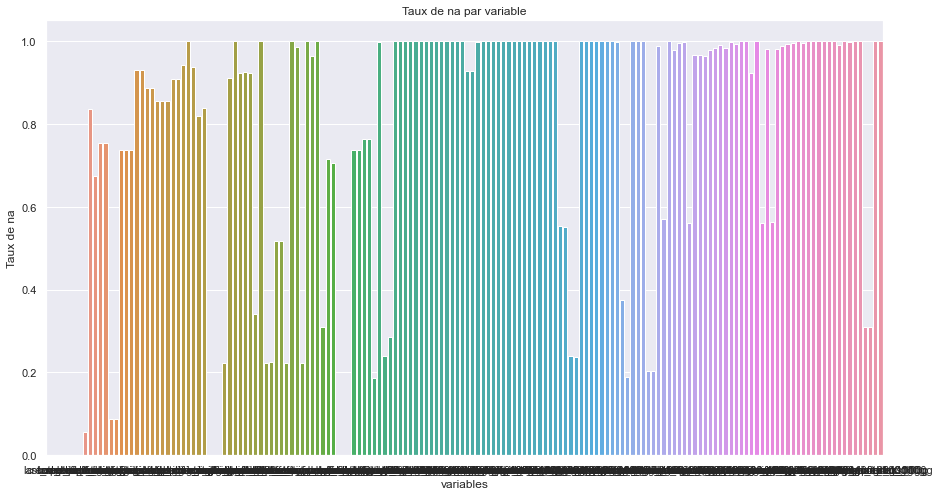

In [167]:
#Calcul et visualisation du taux de valeur manquante pour chaque variable du jeux de données.

mean_na = data.isna().mean()

sns.set(rc = {'figure.figsize':(15,8)})
fig = sns.barplot(x=mean_na.index, y=mean_na.values)
fig.set(title ="Taux de na par variable", xlabel="variables", ylabel="Taux de na")

In [168]:
#Suppression des variables à 100% de valeurs manquantes (colonnes vides) et vérification des dimensions

for i in range(len(mean_na.values)):
    if mean_na.values[i] == 1 :
        del data[mean_na.index[i]]
print(data.shape)

(320772, 146)


In [169]:
list(data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',


[Text(0.5, 1.0, 'Taux de na par variable après suppression des variables vides'),
 Text(0.5, 0, 'variables'),
 Text(0, 0.5, 'Taux de na')]

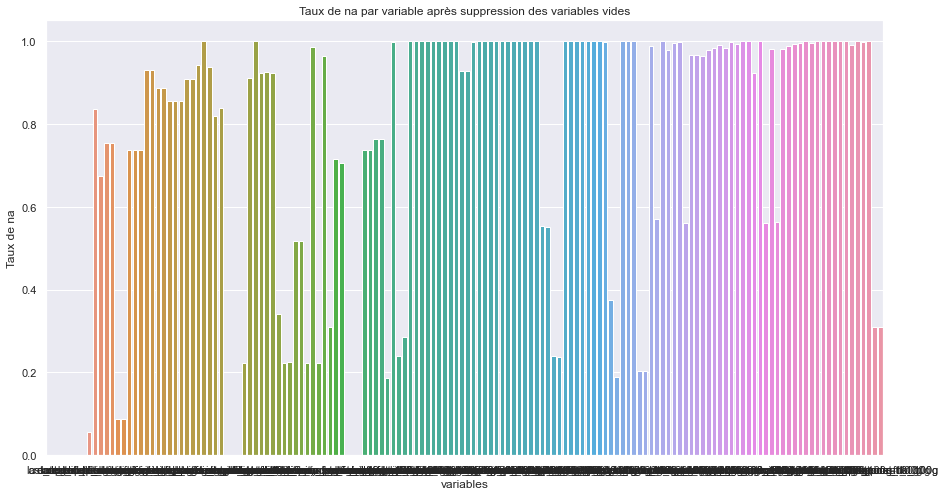

In [170]:
#Calcul et visualisation du taux de valeur manquante pour chaque variable du nouveau jeux de données,
#après suppression des 16 variables totalement vides.

mean_na = data.isna().mean()

sns.set(rc = {'figure.figsize':(15,8)})
fig = sns.barplot(x=mean_na.index, y=mean_na.values)
fig.set(title ="Taux de na par variable après suppression des variables vides",
        xlabel="variables", ylabel="Taux de na")

In [171]:
#Calcul du seuil de taux de valeur manquante à appliquer à notre jeux de données
seuil_na = mean_na.values.mean()
print(round(seuil_na,2))

0.74


In [172]:
#Suppression des variables à au moins 74% de valeurs manquantes et vérification des dimensions :
for i in range(len(mean_na.values)):
    if mean_na.values[i] >= seuil_na :
        del data[mean_na.index[i]]
print(data.shape)

(320772, 45)


In [173]:
list(data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

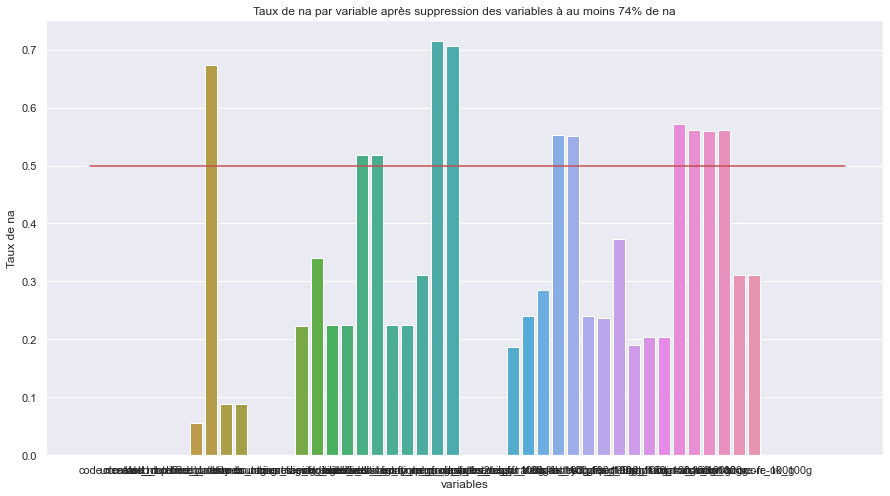

In [174]:
#Calcul et visualisation du taux de valeur manquante pour chaque variable du nouveau jeux de données,
#après suppression des 101 variables non significatives.

mean_na = data.isna().mean()

sns.set(rc = {'figure.figsize':(15,8)})
fig = sns.barplot(x=mean_na.index, y=mean_na.values)
fig.set(title ="Taux de na par variable après suppression des variables à au moins 74% de na",
        xlabel="variables", ylabel="Taux de na")
plt.plot(np.linspace(0,50,100), [0.5]*100, 'r-')

<div class="alert alert-block alert-info">Parmis les 45 varibales maintenues à ce stade du nettoyage, 11 ont un taux de valeur manquante supèrieur à 50%.

On note la suppression des variables :
'carbon-footprint_100g', 'origins', 'manufacturing_places', et 'first_packaging_code_geo'.
L'étape de nettoyage du jeux de données a donc supprimé des variables essentielles pour le calcul d'un score en lien avec l'empreinte carbonne des produits. Il faudra trouver un autre moyen d'exprimer l'empreinte carbonne.

### Identification et suppression des variables à faible valeur ajoutée 

In [175]:
#Supression des données factuelles du produit :

data = data.drop(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t',
                  'last_modified_datetime', 'states', 'states_fr', 'brands', 'brands_tags'], axis=1)
#Vérification des dimensions
print(data.shape)

(320772, 35)


In [176]:
#Pays de vente du produit
print(data['countries_fr'].describe())
print('taux de valeur manquante :',(round(data['countries_fr'].isna().mean(),2)))
print("")
print(data['countries_tags'].describe())
print('taux de valeur manquante :',(round(data['countries_tags'].isna().mean(),2)))

count         320492
unique           722
top       États-Unis
freq          172998
Name: countries_fr, dtype: object
taux de valeur manquante : 0.0

count               320492
unique                 725
top       en:united-states
freq                172998
Name: countries_tags, dtype: object
taux de valeur manquante : 0.0


In [177]:
#Suppression des colonnes 'tags' :
data = data.drop(['countries_tags', 'additives_tags', 'states_tags'], axis=1)
#Vérification des dimensions
print(data.shape)

(320772, 32)


In [178]:
#Pays de vente du produit
print(data['countries_fr'].describe())
print('taux de valeur manquante :', (round(data['countries_fr'].isna().mean(),2)))
print("")
print(data['countries'].describe())
print('taux de valeur manquante :', (round(data['countries'].isna().mean(),2)))

count         320492
unique           722
top       États-Unis
freq          172998
Name: countries_fr, dtype: object
taux de valeur manquante : 0.0

count     320492
unique      1434
top           US
freq      169928
Name: countries, dtype: object
taux de valeur manquante : 0.0


In [179]:
#Les additifs
print(data['additives_fr'].describe())
print('taux de valeur manquante :', (round(data['additives_fr'].isna().mean(),2)))
print("")
print(data['additives'].describe())
print('taux de valeur manquante :', (round(data['additives'].isna().mean(),2)))

count                154680
unique                41537
top       E322 - Lécithines
freq                   8264
Name: additives_fr, dtype: object
taux de valeur manquante : 0.52

count                                                248905
unique                                               196069
top        [ extra-virgin-olive-oil -> en:extra-virgin-o...
freq                                                    397
Name: additives, dtype: object
taux de valeur manquante : 0.22


In [180]:
#Ingrédients avec huile de palme
print(data['ingredients_from_palm_oil_n'].describe())
print('taux de valeur manquante :', (round(data['ingredients_from_palm_oil_n'].isna().mean(),2)))
print("")
print(data['ingredients_that_may_be_from_palm_oil_n'].describe())
print('taux de valeur manquante :', (round(data['ingredients_that_may_be_from_palm_oil_n'].isna().mean(),2)))

count    248939.000000
mean          0.019659
std           0.140524
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64
taux de valeur manquante : 0.22

count    248939.000000
mean          0.055246
std           0.269207
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: ingredients_that_may_be_from_palm_oil_n, dtype: float64
taux de valeur manquante : 0.22


In [181]:
#les scores de nutritions
print(data['nutrition-score-fr_100g'].describe())
print('taux de valeur manquante :', (round(data['nutrition-score-fr_100g'].isna().mean(),2)))
print("")
print(data['nutrition-score-uk_100g'].describe())
print('taux de valeur manquante :', (round(data['nutrition-score-uk_100g'].isna().mean(),2)))

count    221210.000000
mean          9.165535
std           9.055903
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64
taux de valeur manquante : 0.31

count    221210.000000
mean          9.058049
std           9.183589
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          40.000000
Name: nutrition-score-uk_100g, dtype: float64
taux de valeur manquante : 0.31


In [182]:
#Je supprime les variables doublons préalablement identifiées ainsi que de 'serving_size' et 'ingredients_text' (obsolètes ici) :
data = data.drop(['countries', 'serving_size', 'additives_fr', 'additives',
                  'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-uk_100g', 'ingredients_text'],
                 axis=1)
#Vérification des dimensions
print(data.shape)

(320772, 25)


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320749 non-null  object 
 1   product_name                 303010 non-null  object 
 2   quantity                     104819 non-null  object 
 3   countries_fr                 320492 non-null  object 
 4   additives_n                  248939 non-null  float64
 5   ingredients_from_palm_oil_n  248939 non-null  float64
 6   nutrition_grade_fr           221210 non-null  object 
 7   pnns_groups_1                91513 non-null   object 
 8   pnns_groups_2                94491 non-null   object 
 9   energy_100g                  261113 non-null  float64
 10  fat_100g                     243891 non-null  float64
 11  saturated-fat_100g           229554 non-null  float64
 12  trans-fat_100g               143298 non-null  float64
 13 

### Première exploration des variables qualitatives

In [184]:
#Variables de groupement 'pnns_groups_1'

#Nombre de valeur manquante
data['nutrition-score-fr_100g'].describe()
print('taux de valeur manquante :',(round(data['pnns_groups_1'].isna().mean(),2)))
print('')
print('Descriptif:')
print(data['pnns_groups_1'].describe())
print('')
#Comptage
count_pnns_groups_1 = count(data['pnns_groups_1'])
print(len(count_pnns_groups_1), 'catégories :')
print(count_pnns_groups_1)

taux de valeur manquante : 0.71

Descriptif:
count       91513
unique         14
top       unknown
freq        22624
Name: pnns_groups_1, dtype: object

15 catégories :
Counter({nan: 229259, 'unknown': 22624, 'Sugary snacks': 12368, 'Beverages': 9033, 'Milk and dairy products': 8825, 'Cereals and potatoes': 8442, 'Fish Meat Eggs': 8041, 'Composite foods': 6747, 'Fruits and vegetables': 5908, 'Fat and sauces': 5216, 'Salty snacks': 2809, 'fruits-and-vegetables': 987, 'sugary-snacks': 496, 'cereals-and-potatoes': 16, 'salty-snacks': 1})


In [185]:
#J'uniformise les catégories concernées :
data['pnns_groups_1'] = data['pnns_groups_1'].replace(
    ['cereals-and-potatoes', 'fruits-and-vegetables', 'sugary-snacks', 'salty-snacks']
    ,['Cereals and potatoes', 'Fruits and vegetables', 'Sugary snacks', 'Salty snacks'])

#Comptage
count_pnns_groups_1 = count(data['pnns_groups_1'])
print(len(count_pnns_groups_1), 'catégories :')
print(count_pnns_groups_1)

11 catégories :
Counter({nan: 229259, 'unknown': 22624, 'Sugary snacks': 12864, 'Beverages': 9033, 'Milk and dairy products': 8825, 'Cereals and potatoes': 8458, 'Fish Meat Eggs': 8041, 'Fruits and vegetables': 6895, 'Composite foods': 6747, 'Fat and sauces': 5216, 'Salty snacks': 2810})


[Text(0.5, 1.0, "Représentation graphique des effectifs par catégorie pour la variable 'pnns_groups_1'"),
 Text(0.5, 0, 'effectifs'),
 Text(0, 0.5, 'catégories')]

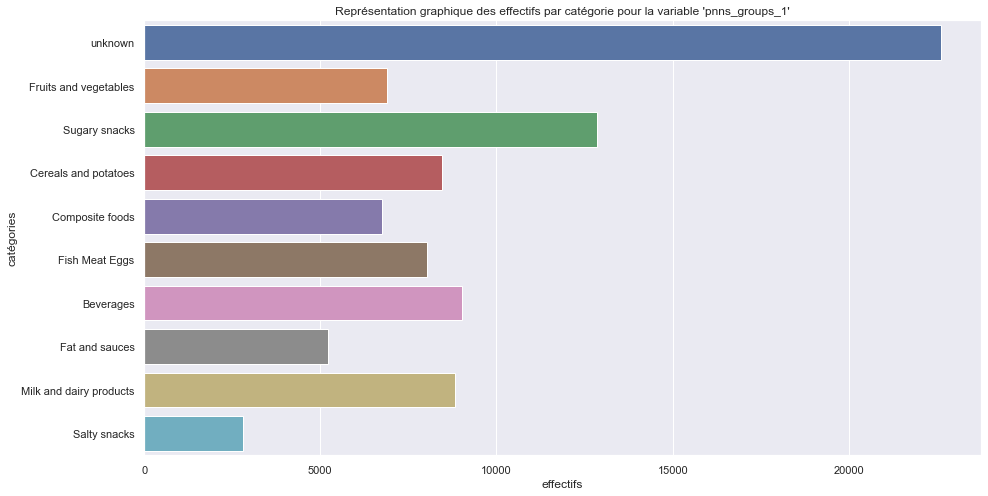

In [186]:
#Représentation graphique des effectifs par catégorie
sns.set(rc = {'figure.figsize':(15,8)})
categories = list(count_pnns_groups_1.keys())
effectifs = list(count_pnns_groups_1.values())
fig = sns.barplot(x=effectifs, y=categories,orient="h")
fig.set(title ="Représentation graphique des effectifs par catégorie pour la variable 'pnns_groups_1'",
        xlabel="effectifs", ylabel="catégories")

In [187]:
#Variables de groupement 'pnns_groups_2'

#Nombre de valeur manquante
print('Nomre de valeur manquante :',(data['pnns_groups_2'].isnull().sum()))
print('taux de valeur manquante :',(round(data['pnns_groups_2'].isna().mean(),2)))
print('')
print('Descriptif:')
print(data['pnns_groups_2'].describe())
print('')
#Comptage
count_pnns_groups_2 = count(data['pnns_groups_2'])
print(len(count_pnns_groups_2), 'catégories :')
print(count_pnns_groups_2)

Nomre de valeur manquante : 226281
taux de valeur manquante : 0.71

Descriptif:
count       94491
unique         42
top       unknown
freq        22624
Name: pnns_groups_2, dtype: object

43 catégories :
Counter({nan: 226281, 'unknown': 22624, 'One-dish meals': 5546, 'Sweets': 4698, 'Biscuits and cakes': 4561, 'Non-sugared beverages': 4302, 'Cereals': 4106, 'Cheese': 4024, 'Dressings and sauces': 3602, 'Milk and yogurt': 3297, 'Processed meat': 3247, 'Chocolate products': 3109, 'Alcoholic beverages': 2909, 'Vegetables': 2840, 'Fish and seafood': 2638, 'Sweetened beverages': 2170, 'Appetizers': 2101, 'Fruits': 2068, 'Fruit juices': 1924, 'Bread': 1838, 'Meat': 1694, 'Fats': 1614, 'Breakfast cereals': 1408, 'vegetables': 934, 'Legumes': 925, 'Dairy desserts': 783, 'Ice cream': 721, 'Nuts': 689, 'Sandwich': 686, 'Pizza pies and quiche': 515, 'Soups': 503, 'Dried fruits': 497, 'pastries': 496, 'Eggs': 462, 'Fruit nectars': 376, 'Artificially sweetened beverages': 261, 'Potatoes': 165, 'Tri

[Text(0.5, 1.0, "Représentation graphique des effectifs par catégorie pour la variable 'pnns_groups_2'"),
 Text(0.5, 0, 'effectifs'),
 Text(0, 0.5, 'catégories')]

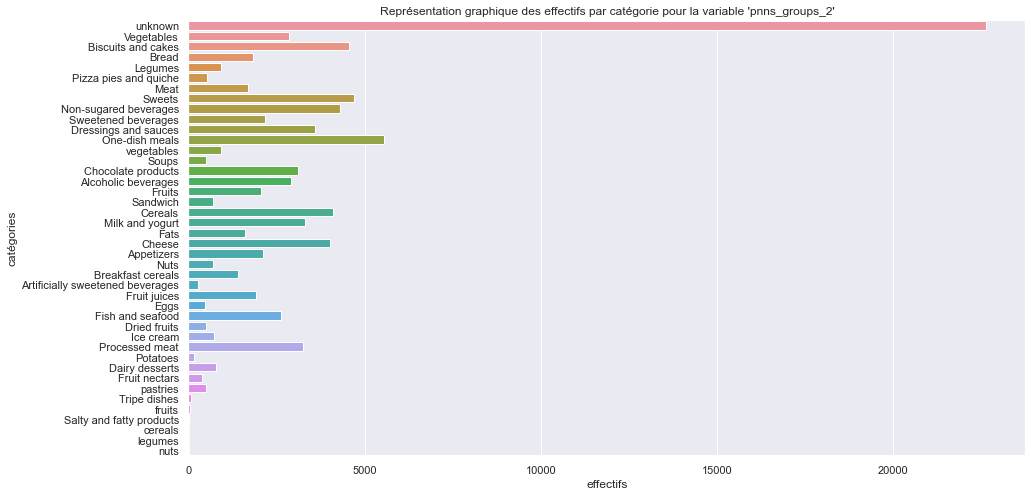

In [188]:
#Représentation graphique des effectifs par catégorie
sns.set(rc = {'figure.figsize':(15,8)})
categories = list(count_pnns_groups_2.keys())
effectifs = list(count_pnns_groups_2.values())
fig = sns.barplot(x=effectifs, y=categories,orient="h")
fig.set(title ="Représentation graphique des effectifs par catégorie pour la variable 'pnns_groups_2'",
        xlabel="effectifs", ylabel="catégories")

In [189]:
#Supression de 'pnns_groups_2' :
print(data.shape)
data = data.drop(['pnns_groups_2'], axis=1)
print(data.shape)

(320772, 25)
(320772, 24)


In [190]:
#Variables d'identification' 'product_name'
print('Descriptif:')
print(data['product_name'].describe())
print('')
#Nombre de valeur manquante
print('Nomre de valeur manquante :',(data['product_name'].isnull().sum()))
print('taux de valeur manquante :',(round(data['product_name'].isna().mean(),2)))

Descriptif:
count        303010
unique       221347
top       Ice Cream
freq            410
Name: product_name, dtype: object

Nomre de valeur manquante : 17762
taux de valeur manquante : 0.06


In [191]:
data['product_name'].head(20)

0                    Farine de blé noir
1        Banana Chips Sweetened (Whole)
2                               Peanuts
3                Organic Salted Nut Mix
4                       Organic Polenta
5     Breadshop Honey Gone Nuts Granola
6         Organic Long Grain White Rice
7                        Organic Muesli
8          Organic Dark Chocolate Minis
9                 Organic Sunflower Oil
10                 Organic Adzuki Beans
11                  Organic Penne Pasta
12                        Zen Party Mix
13            Organic Golden Flax Seeds
14                  Organic Spicy Punks
15                 Cinnamon Nut Granola
16                    Organic Hazelnuts
17       Organic Sweetened Banana Chips
18     Lotus Organic Brown Jasmine Rice
19                   Organic Oat Groats
Name: product_name, dtype: object

In [192]:
#Supression de 'product_name' :
print(data.shape)
data = data.drop(['product_name'], axis=1)
print(data.shape)

(320772, 24)
(320772, 23)


In [193]:
#Variable 'quantity'

#Nombre de valeur manquante
print('Nomre de valeur manquante :',(data['quantity'].isnull().sum()))
print('taux de valeur manquante :',(round(data['quantity'].isna().mean(),2)))
print('')
print('Descriptif:')
print(data['quantity'].describe())
print('')
#Comptage
count_quantity = count(data['quantity'])
print(len(count_quantity), 'catégories :')
print(count_quantity)

Nomre de valeur manquante : 215953
taux de valeur manquante : 0.67

Descriptif:
count     104819
unique     13826
top        500 g
freq        4669
Name: quantity, dtype: object

13827 catégories :
Counter({nan: 215953, '500 g': 4669, '200 g': 4063, '250 g': 3883, '100 g': 3043, '400 g': 2523, '300 g': 2452, '150 g': 2303, '1 l': 1636, '1 kg': 1592, '125 g': 1503, '1 L': 1284, '1': 1150, '500g': 1140, '180 g': 1099, '350 g': 1052, '75 cl': 984, '250g': 931, '200g': 889, '500 ml': 823, '120 g': 781, '450 g': 683, '100g': 672, '600 g': 626, '300g': 624, '50 cl': 612, '750 ml': 606, '400g': 604, '80 g': 594, '33 cl': 591, '800 g': 544, '250 ml': 539, '90 g': 522, '50 g': 516, '160 g': 515, '240 g': 504, '150g': 503, '750 g': 502, '220 g': 458, '190 g': 455, '280 g': 447, '375 g': 416, '1kg': 390, '140 g': 379, '175 g': 372, '125g': 371, '360 g': 362, '40 g': 354, '1,5 l': 348, '230 g': 343, '1L': 337, '130 g': 329, '340 g': 314, '320 g': 307, '25 cl': 307, '75 g': 299, '1l': 295, '1000 g'

<div class="alert alert-block alert-info">Les données 'quantity' sont très hétérogènes. Leur traitement serait extrêment chronophage. C'est pourtant une information essentielle pour traiter la problématique de l'empreinte carbonne par produit, qui est ramenée par gramme.

Afin de maintenir cette thématique qui me semble pertinante au vue de l'éveil des consciences écologiques que connait notre époque, notamment auprès des jeunes, je décide d'utiliser des données externes validées, issues d'une publication de 2018 dans le journal Sciences :
https://josephpoore.com/Poore%20and%20Nemecek%20(2018)%20Reducing%20foods%20environmental%20impacts%20through%20producers%20and%20consumers.pdf

Cette étude a permis de quantifier l'empreinte carbonne par type de produit, en y incluant toutes les étapes, de la production à la consommation finale. Celà nous permet de remplacerv les variables essentielles excluent par la méthodologie de nettoyage de données choisie. Ainsi je supprime les variables 'quantity' et 'countries_fr'

In [194]:
#Supression de 'quantity':
print(data.shape)
data = data.drop(['quantity', 'countries_fr'], axis=1)
print(data.shape)

(320772, 23)
(320772, 21)


In [195]:
#Variable 'nutrition_grade_fr'

#Nombre de valeur manquante
print('Nomre de valeur manquante :',(data['nutrition_grade_fr'].isnull().sum()))
print('taux de valeur manquante :',(round(data['nutrition_grade_fr'].isna().mean(),2)))
print('')
print('Descriptif:')
print(data['nutrition_grade_fr'].describe())
print('')
#Comptage
count_nutrition_grade_fr = count(data['nutrition_grade_fr'])
print(len(count_nutrition_grade_fr), 'catégories :')
print(count_nutrition_grade_fr)

Nomre de valeur manquante : 99562
taux de valeur manquante : 0.31

Descriptif:
count     221210
unique         5
top            d
freq       62763
Name: nutrition_grade_fr, dtype: object

6 catégories :
Counter({nan: 99562, 'd': 62763, 'c': 45538, 'e': 43030, 'a': 35634, 'b': 34245})


[Text(0.5, 1.0, "Représentation graphique des effectifs par catégorie pour la variable 'nutrition_grade_fr'"),
 Text(0.5, 0, 'effectifs'),
 Text(0, 0.5, 'catégories')]

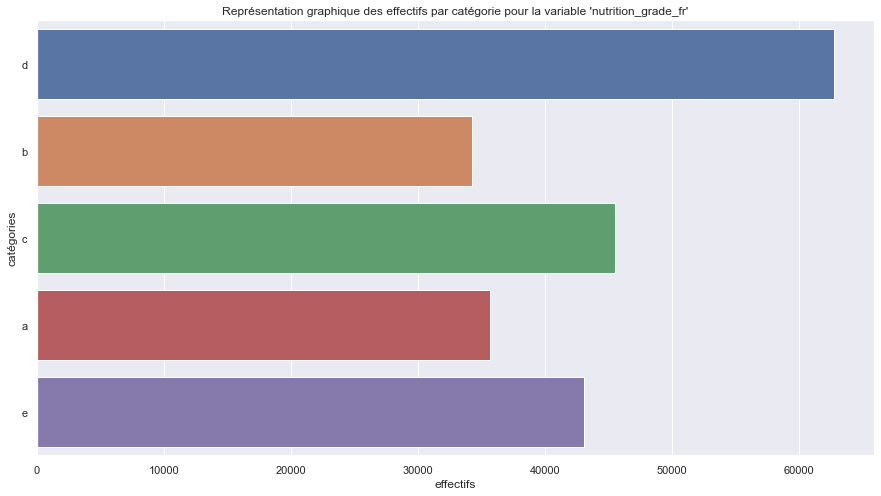

In [196]:
#Représentation graphique des effectifs par catégorie
sns.set(rc = {'figure.figsize':(15,8)})
categories = list(count_nutrition_grade_fr.keys())
effectifs = list(count_nutrition_grade_fr.values())
fig = sns.barplot(x=effectifs, y=categories,orient="h")
fig.set(title ="Représentation graphique des effectifs par catégorie pour la variable 'nutrition_grade_fr'",
        xlabel="effectifs", ylabel="catégories")

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320749 non-null  object 
 1   additives_n                  248939 non-null  float64
 2   ingredients_from_palm_oil_n  248939 non-null  float64
 3   nutrition_grade_fr           221210 non-null  object 
 4   pnns_groups_1                91513 non-null   object 
 5   energy_100g                  261113 non-null  float64
 6   fat_100g                     243891 non-null  float64
 7   saturated-fat_100g           229554 non-null  float64
 8   trans-fat_100g               143298 non-null  float64
 9   cholesterol_100g             144090 non-null  float64
 10  carbohydrates_100g           243588 non-null  float64
 11  sugars_100g                  244971 non-null  float64
 12  fiber_100g                   200886 non-null  float64
 13 

## Réduction des dimensions du jeux de données : lignes

### Supression des lignes vides

In [198]:
print(data.shape)
data.dropna(how = 'all')
print(data.shape)

(320772, 21)
(320772, 21)


### Recherche des répétitions d'individus

In [199]:
#Nombre de valeur manquante
print('Nomre de valeur manquante :',(data['code'].isnull().sum()))
print('Taux de valeur manquante :',(round(data['code'].isna().mean(),2)))

Nomre de valeur manquante : 23
Taux de valeur manquante : 0.0


In [200]:
#Identification des index des lignes qui n'ont pas de 'code'
index_with_nan = data.index[data['code'].isnull()]
print(index_with_nan)
print(len(index_with_nan))

Int64Index([189068, 189103, 189109, 189119, 189152, 189160, 189162, 189168,
            189242, 189244, 189248, 189250, 189260, 189262, 189269, 189272,
            189345, 189362, 189364, 189379, 189404, 189406, 189417],
           dtype='int64')
23


In [201]:
#Suppression des lignes précédemment identifiées
print(data.shape)
data.drop(index_with_nan,0, inplace=True)
print(data.shape)

(320772, 21)
(320749, 21)


C:\Users\n_a_e\AppData\Local\Temp/ipykernel_17232/2756822284.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(index_with_nan,0, inplace=True)


In [202]:
print('Nomre de valeur manquante :',(data['code'].isnull().sum()))
print('Taux de valeur manquante :',(round(data['code'].isna().mean(),2)))

Nomre de valeur manquante : 0
Taux de valeur manquante : 0.0


Les 23 lignes sans code produit ont bien été supprimées. Je peux à présent rechercher la présence de doublons de manière pertinente.

In [203]:
data['code'].describe()

count          320749
unique         320638
top       24463061071
freq                2
Name: code, dtype: int64

In [204]:
#recherche des répétitions de produit :
code_rep = data['code'].duplicated(keep=False)
data[code_rep].describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,195.000000,195.000000,188.000000,188.000000,145.000000,126.000000,128.000000,190.000000,168.000000,140.000000,184.000000,191.000000,191.000000,130.000000,139.000000,134.000000,136.000000,138.000000
mean,2.138462,0.005128,1125.707447,13.658564,6.558345,0.014524,0.006805,32.001789,15.780417,3.835714,6.493478,2.122181,0.835514,0.000061,0.004989,0.064425,0.001557,10.826087
std,2.232909,0.071611,887.549336,18.474862,10.528490,0.096429,0.016136,25.090109,16.226822,4.477326,7.977728,3.220289,1.267830,0.000163,0.023279,0.150292,0.002081,8.378730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,0.000000,0.000000,277.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.130000,0.000000,0.000000,0.170180,0.067000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,0.000000,981.000000,4.480000,1.430000,0.000000,0.000000,25.405000,10.000000,2.700000,4.485000,0.840740,0.331000,0.000000,0.000000,0.013500,0.000950,12.000000
75%,4.000000,0.000000,1948.000000,23.330000,9.380000,0.000000,0.000000,55.420000,23.082500,5.825000,8.992500,2.614930,1.029500,0.000043,0.002700,0.071500,0.002400,17.750000
max,11.000000,1.000000,3830.000000,100.000000,61.290000,0.830000,0.100000,82.000000,61.900000,20.000000,40.000000,17.780000,7.000000,0.001071,0.260900,1.200000,0.013160,26.000000


In [205]:
data[code_rep].shape

(222, 21)

In [206]:
data[code_rep].groupby('code').size().sort_values()

code
11778            2
72457990227      2
72220009989      2
72220009941      2
72220008593      2
                ..
14100097037      2
14100079477      2
14100074724      2
17400140045      2
5400141350470    2
Length: 111, dtype: int64

In [207]:
data[code_rep].groupby('code').size().sort_values().head()

code
11778          2
72457990227    2
72220009989    2
72220009941    2
72220008593    2
dtype: int64

In [208]:
data[code_rep].groupby('code').size().sort_values().tail()

code
14100097037      2
14100079477      2
14100074724      2
17400140045      2
5400141350470    2
dtype: int64

In [209]:
data[data['code'] == 11778]

,code,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
458,11778,6.0,0.0,d,Sugary snacks,1809.0,13.3,7.0,NaN,NaN,...,35.7,2.5,6.1,0.83,0.326772,NaN,NaN,NaN,NaN,18.0
9892,11778,6.0,0.0,d,Sugary snacks,1809.0,13.3,7.0,NaN,NaN,...,35.7,2.5,6.1,0.83,0.326772,NaN,NaN,NaN,NaN,18.0


In [210]:
data[data['code'] == 5400141350470]

,code,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
116492,5400141350470,1.0,0.0,b,unknown,1634.0,1.5,0.4,NaN,NaN,...,17.0,3.1,9.4,0.88,0.346457,NaN,NaN,NaN,NaN,1.0
276819,5400141350470,NaN,NaN,b,NaN,1611.0,NaN,0.4,NaN,NaN,...,17.0,3.1,9.4,0.88,0.346457,NaN,NaN,NaN,NaN,1.0


In [211]:
data[data['code'] == 72220009941]

,code,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
670,72220009941,1.0,0.0,c,NaN,929.0,4.17,0.0,0.0,0.028,...,5.56,2.8,2.78,1.12776,0.444,0.0,0.0,0.000,0.001,3.0
79578,72220009941,1.0,0.0,b,NaN,1163.0,4.17,0.0,0.0,0.028,...,5.56,5.6,5.56,1.27000,0.500,0.0,0.0,0.056,0.001,1.0


In [212]:
data[data['code'] == 72220008593]

,code,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
669,72220008593,2.0,0.0,a,NaN,1071.0,5.81,0.0,0.0,0.0,...,9.3,7.0,11.63,0.88646,0.349,0.0,0.0,0.047,0.00251,-2.0
79568,72220008593,3.0,0.0,a,NaN,1071.0,5.81,0.0,0.0,0.0,...,9.3,7.0,11.63,0.94488,0.372,0.0,0.0,0.047,0.00251,-1.0


In [213]:
#Suppression des doublons préalablement identifiés
print(data.shape)
data.drop_duplicates(subset ="code", keep = 'first', inplace=True)
print(data.shape)

(320749, 21)
(320638, 21)


In [214]:
print(data.shape)
data = data.drop(['code'],axis=1)
print(data.shape)

(320638, 21)
(320638, 20)


## Traitement des outliers par exploration des variables quantitatives

<AxesSubplot:>

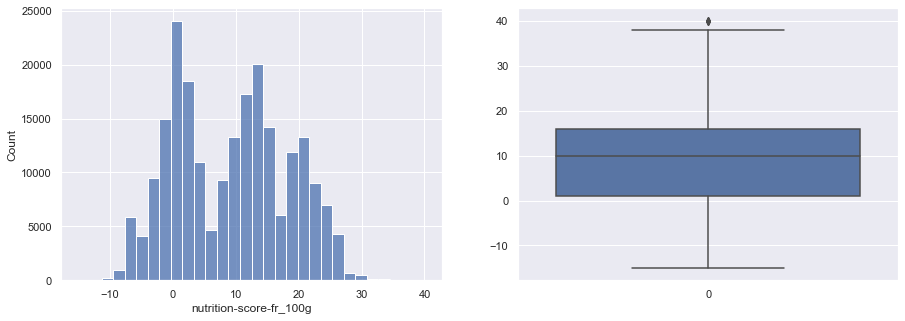

In [215]:
#Histogrammes de distribution et boxplots de 'nutrition-score-fr_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="nutrition-score-fr_100g", bins=30, ax=ax1)
sns.boxplot(data = data["nutrition-score-fr_100g"], ax=ax2)

In [216]:
print(data['nutrition-score-fr_100g'].describe())
print('Nomre de valeur manquante :',(data['nutrition-score-fr_100g'].isnull().sum()))

count    221147.000000
mean          9.165365
std           9.056116
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64
Nomre de valeur manquante : 99491


<AxesSubplot:>

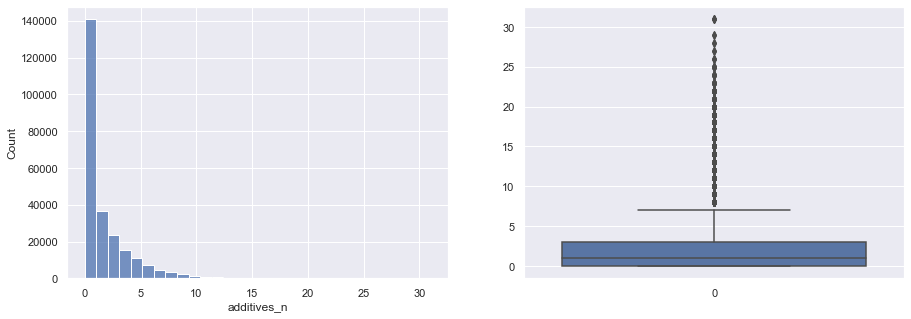

In [217]:
#Histogrammes de distribution et boxplots de 'additives_n'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="additives_n", bins=30, ax=ax1)
sns.boxplot(data = data["additives_n"], ax=ax2)

In [218]:
print(data["additives_n"].describe())
print('Nomre de valeur manquante :',(data['additives_n'].isnull().sum()))

count    248850.000000
mean          1.935953
std           2.502078
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64
Nomre de valeur manquante : 71788


<AxesSubplot:>

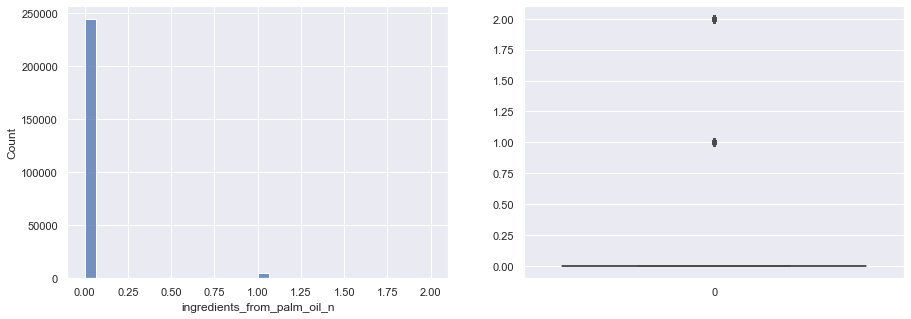

In [219]:
#Histogrammes de distribution et boxplots de 'ingredients_from_palm_oil_n'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="ingredients_from_palm_oil_n", bins=30, ax=ax1)
sns.boxplot(data = data["ingredients_from_palm_oil_n"], ax=ax2)

In [220]:
print(data["ingredients_from_palm_oil_n"].describe())
print('Nomre de valeur manquante :',(data['ingredients_from_palm_oil_n'].isnull().sum()))

count    248850.000000
mean          0.019666
std           0.140549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: ingredients_from_palm_oil_n, dtype: float64
Nomre de valeur manquante : 71788


<AxesSubplot:>

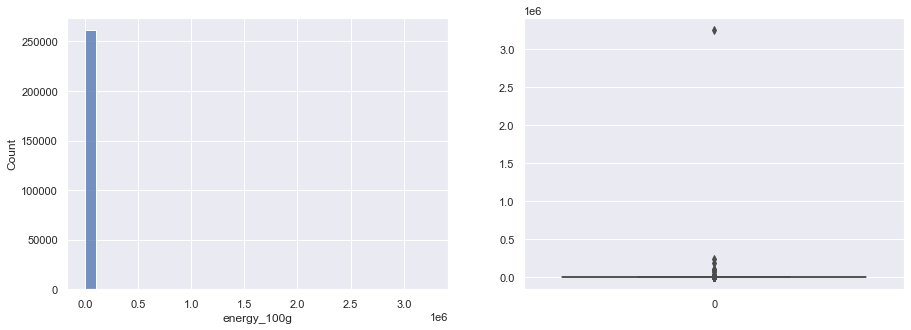

In [221]:
#Histogrammes de distribution et boxplots de 'energy_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="energy_100g", bins=30, ax=ax1)
sns.boxplot(data = data["energy_100g"], ax=ax2)

In [222]:
print(data['energy_100g'].describe())
print('Nomre de valeur manquante :',(data['energy_100g'].isnull().sum()))

count    2.610290e+05
mean     1.141949e+03
std      6.448174e+03
min      0.000000e+00
25%      3.770000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64
Nomre de valeur manquante : 59609


In [225]:
#Suppression des outliers :
data.loc[data['energy_100g']>3*10**6, 'energy_100g'] = np.nan

<AxesSubplot:>

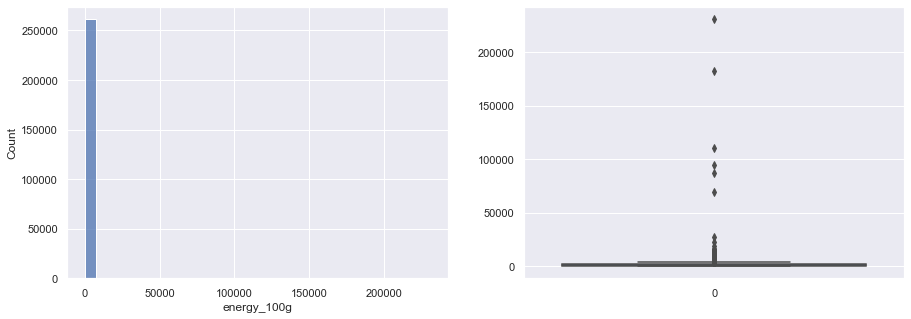

In [226]:
#Histogrammes de distribution et boxplots de 'energy_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="energy_100g", bins=30, ax=ax1)
sns.boxplot(data = data["energy_100g"], ax=ax2)

In [227]:
print(data['energy_100g'].describe())
print('Nomre de valeur manquante :',(data['energy_100g'].isnull().sum()))

count    261028.000000
mean       1129.497821
std        1052.629789
min           0.000000
25%         377.000000
50%        1100.000000
75%        1674.000000
max      231199.000000
Name: energy_100g, dtype: float64
Nomre de valeur manquante : 59610


<AxesSubplot:>

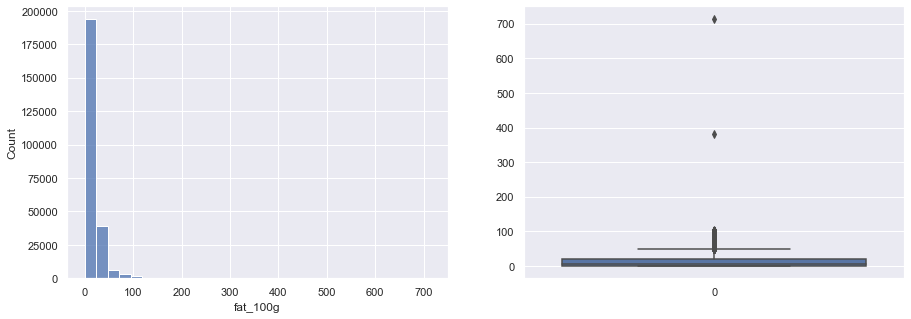

In [228]:
#Histogrammes de distribution et boxplots de 'fat_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="fat_100g", bins=30, ax=ax1)
sns.boxplot(data = data["fat_100g"], ax=ax2)

In [229]:
print(data['fat_100g'].describe())
print('Nomre de valeur manquante :',(data['fat_100g'].isnull().sum()))

count    243803.000000
mean         12.730510
std          17.578981
min           0.000000
25%           0.000000
50%           5.000000
75%          20.000000
max         714.290000
Name: fat_100g, dtype: float64
Nomre de valeur manquante : 76835


In [230]:
#Suppression des outliers:
data.loc[data['fat_100g']>100, 'fat_100g'] = np.nan

In [231]:
print(data['fat_100g'].describe())
print('Nomre de valeur manquante :',(data['fat_100g'].isnull().sum()))

count    243799.000000
mean         12.725386
std          17.503904
min           0.000000
25%           0.000000
50%           5.000000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64
Nomre de valeur manquante : 76839


<AxesSubplot:>

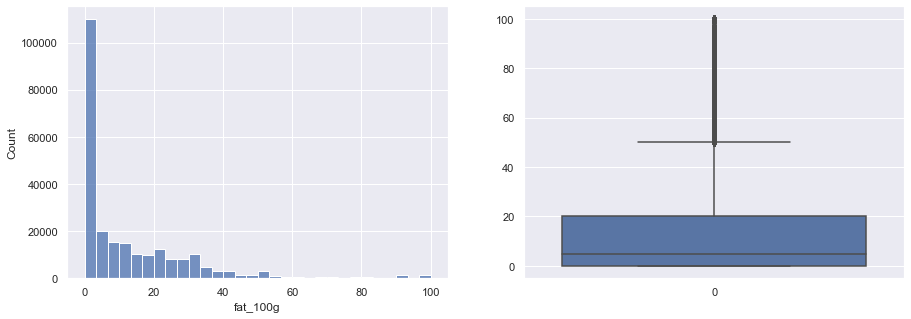

In [232]:
#Histogrammes de distribution et boxplots de 'fat_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="fat_100g", bins=30, ax=ax1)
sns.boxplot(data = data["fat_100g"], ax=ax2)

<AxesSubplot:>

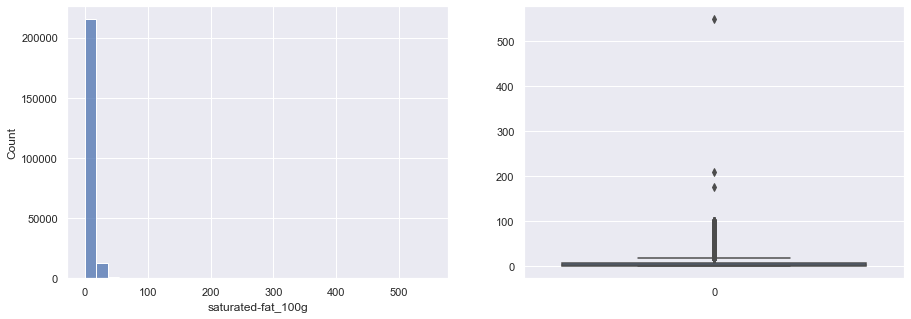

In [233]:
#Histogrammes de distribution et boxplots de 'saturated-fat_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="saturated-fat_100g", bins=30, ax=ax1)
sns.boxplot(data = data["saturated-fat_100g"], ax=ax2)

In [234]:
print(data['saturated-fat_100g'].describe())
print('Nomre de valeur manquante :',(data['saturated-fat_100g'].isnull().sum()))

count    229486.000000
mean          5.129695
std           8.013391
min           0.000000
25%           0.000000
50%           1.790000
75%           7.140000
max         550.000000
Name: saturated-fat_100g, dtype: float64
Nomre de valeur manquante : 91152


In [235]:
#Suppression des outliers:
data.loc[data['saturated-fat_100g']>100, 'saturated-fat_100g'] = np.nan

In [236]:
print(data['saturated-fat_100g'].describe())
print('Nomre de valeur manquante :',(data['saturated-fat_100g'].isnull().sum()))

count    229483.000000
mean          5.125686
std           7.912797
min           0.000000
25%           0.000000
50%           1.790000
75%           7.140000
max         100.000000
Name: saturated-fat_100g, dtype: float64
Nomre de valeur manquante : 91155


<AxesSubplot:>

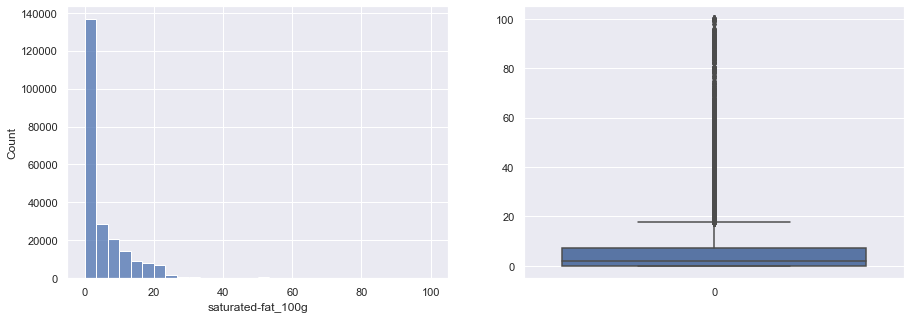

In [237]:
#Histogrammes de distribution et boxplots de 'saturated-fat_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="saturated-fat_100g", bins=30, ax=ax1)
sns.boxplot(data = data["saturated-fat_100g"], ax=ax2)

<AxesSubplot:>

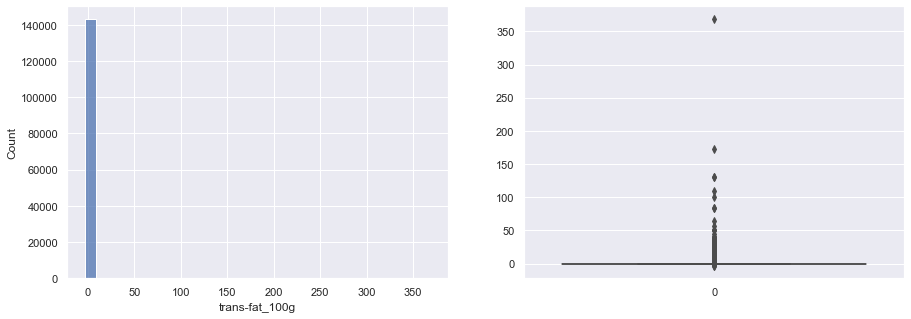

In [238]:
#Histogrammes de distribution et boxplots de 'trans-fat_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="trans-fat_100g", bins=30, ax=ax1)
sns.boxplot(data = data["trans-fat_100g"], ax=ax2)

In [239]:
print(data['trans-fat_100g'].describe())
print('Nomre de valeur manquante :',(data['trans-fat_100g'].isnull().sum()))

count    143245.000000
mean          0.073500
std           1.540507
min          -3.570000
25%           0.000000
50%           0.000000
75%           0.000000
max         369.000000
Name: trans-fat_100g, dtype: float64
Nomre de valeur manquante : 177393


In [240]:
#Suppression des outliers:
data.loc[data['trans-fat_100g']>100, 'trans-fat_100g'] = np.nan
data.loc[data['trans-fat_100g']<0, 'trans-fat_100g'] = np.nan

<AxesSubplot:>

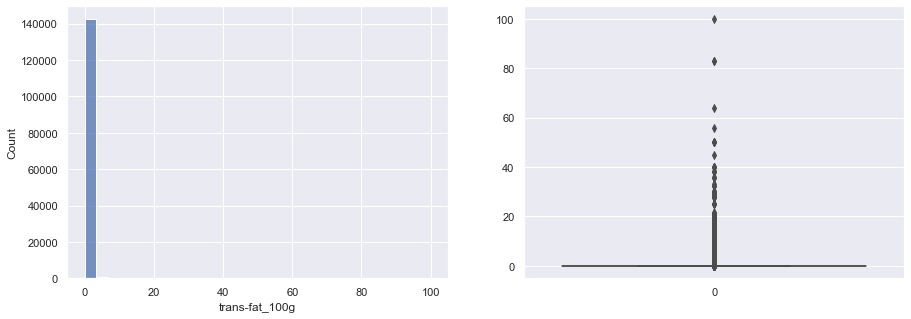

In [241]:
#Histogrammes de distribution et boxplots de 'trans-fat_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="trans-fat_100g", bins=30, ax=ax1)
sns.boxplot(data = data["trans-fat_100g"], ax=ax2)

In [242]:
print(data['trans-fat_100g'].describe())
print('Nomre de valeur manquante :',(data['trans-fat_100g'].isnull().sum()))

count    143236.000000
mean          0.067193
std           0.945193
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: trans-fat_100g, dtype: float64
Nomre de valeur manquante : 177402


<AxesSubplot:>

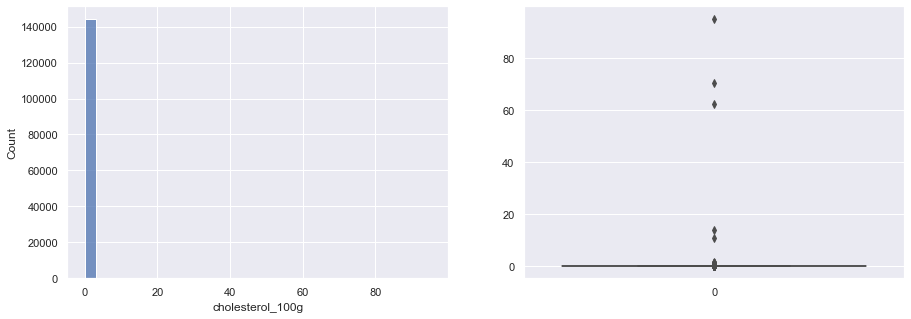

In [243]:
#Histogrammes de distribution et boxplots de 'cholesterol_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="cholesterol_100g", bins=30, ax=ax1)
sns.boxplot(data = data["cholesterol_100g"], ax=ax2)

In [244]:
print(data['cholesterol_100g'].describe())
print('Nomre de valeur manquante :',(data['cholesterol_100g'].isnull().sum()))

count    144032.000000
mean          0.020077
std           0.358133
min           0.000000
25%           0.000000
50%           0.000000
75%           0.020000
max          95.238000
Name: cholesterol_100g, dtype: float64
Nomre de valeur manquante : 176606


In [245]:
#Suppression des outliers:
data.loc[data['cholesterol_100g']>100, 'cholesterol_100g'] = np.nan

<AxesSubplot:>

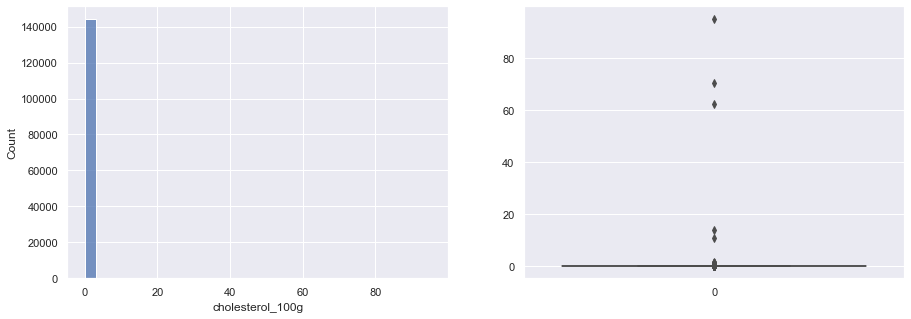

In [246]:
#Histogrammes de distribution et boxplots de 'cholesterol_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="cholesterol_100g", bins=30, ax=ax1)
sns.boxplot(data = data["cholesterol_100g"], ax=ax2)

In [247]:
print(data['cholesterol_100g'].describe())
print('Nomre de valeur manquante :',(data['cholesterol_100g'].isnull().sum()))

count    144032.000000
mean          0.020077
std           0.358133
min           0.000000
25%           0.000000
50%           0.000000
75%           0.020000
max          95.238000
Name: cholesterol_100g, dtype: float64
Nomre de valeur manquante : 176606


<AxesSubplot:>

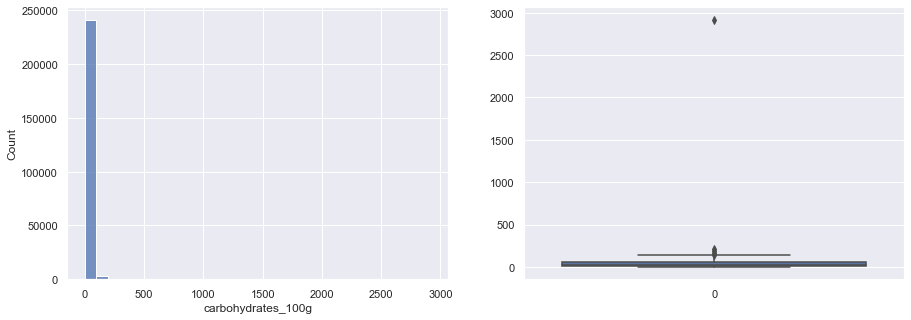

In [248]:
#Histogrammes de distribution et boxplots de 'carbohydrates_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="carbohydrates_100g", bins=30, ax=ax1)
sns.boxplot(data = data["carbohydrates_100g"], ax=ax2)

In [249]:
print(data['carbohydrates_100g'].describe())
print('Nomre de valeur manquante :',(data['carbohydrates_100g'].isnull().sum()))

count    243500.000000
mean         32.074322
std          29.733480
min           0.000000
25%           6.000000
50%          20.600000
75%          58.330000
max        2916.670000
Name: carbohydrates_100g, dtype: float64
Nomre de valeur manquante : 77138


In [250]:
#Suppression des outliers:
data.loc[data['carbohydrates_100g']>100, 'carbohydrates_100g'] = np.nan

In [251]:
print(data['carbohydrates_100g'].describe())
print('Nomre de valeur manquante :',(data['carbohydrates_100g'].isnull().sum()))

count    243481.000000
mean         32.055657
std          29.142261
min           0.000000
25%           6.000000
50%          20.600000
75%          58.330000
max         100.000000
Name: carbohydrates_100g, dtype: float64
Nomre de valeur manquante : 77157


<AxesSubplot:>

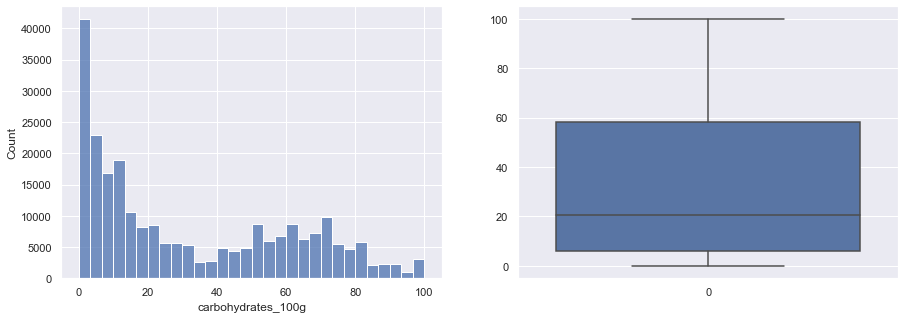

In [252]:
#Histogrammes de distribution et boxplots de 'carbohydrates_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="carbohydrates_100g", bins=30, ax=ax1)
sns.boxplot(data = data["carbohydrates_100g"], ax=ax2)

<AxesSubplot:>

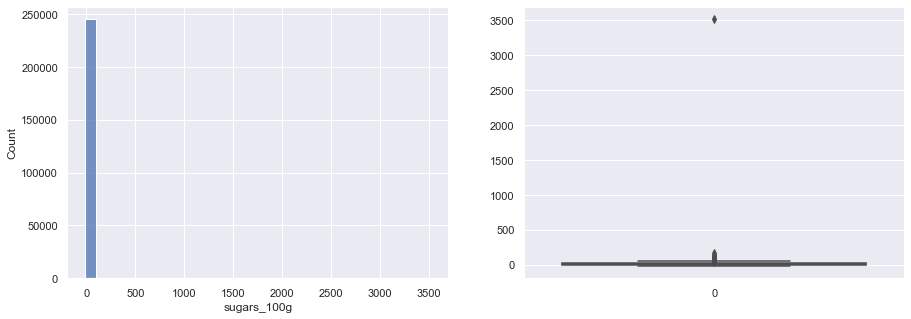

In [253]:
#Histogrammes de distribution et boxplots de 'sugars_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="sugars_100g", bins=30, ax=ax1)
sns.boxplot(data = data["sugars_100g"], ax=ax2)

In [254]:
print(data['sugars_100g'].describe())
print('Nomre de valeur manquante :',(data['sugars_100g'].isnull().sum()))

count    244895.000000
mean         16.004032
std          22.329094
min         -17.860000
25%           1.300000
50%           5.710000
75%          24.000000
max        3520.000000
Name: sugars_100g, dtype: float64
Nomre de valeur manquante : 75743


In [255]:
#Suppression des outliers:
data.loc[data['sugars_100g']>100, 'sugars_100g'] = np.nan
data.loc[data['sugars_100g']<0, 'sugars_100g'] = np.nan

In [256]:
print(data['sugars_100g'].describe())
print('Nomre de valeur manquante :',(data['sugars_100g'].isnull().sum()))

count    244876.000000
mean         15.985992
std          21.166902
min           0.000000
25%           1.300000
50%           5.710000
75%          24.000000
max         100.000000
Name: sugars_100g, dtype: float64
Nomre de valeur manquante : 75762


<AxesSubplot:>

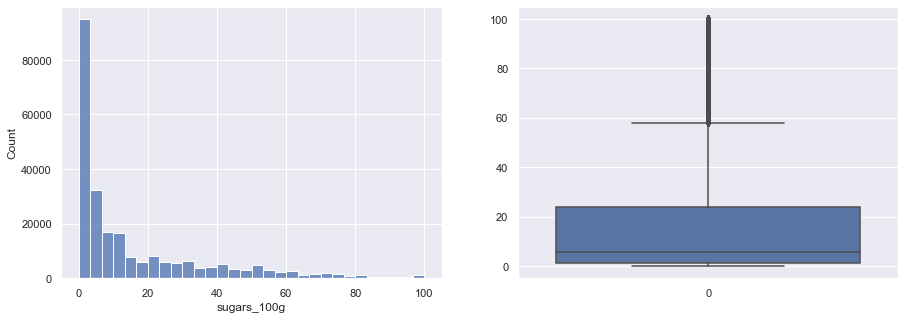

In [257]:
#Histogrammes de distribution et boxplots de 'sugars_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="sugars_100g", bins=30, ax=ax1)
sns.boxplot(data = data["sugars_100g"], ax=ax2)

<AxesSubplot:>

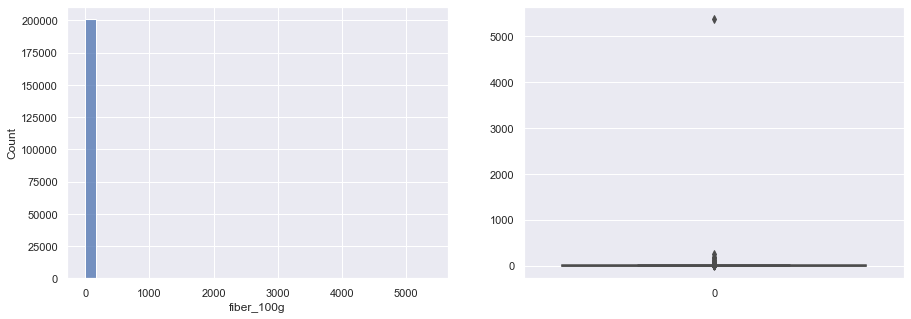

In [258]:
#Histogrammes de distribution et boxplots de 'fiber_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="fiber_100g", bins=30, ax=ax1)
sns.boxplot(data = data["fiber_100g"], ax=ax2)

In [259]:
print(data['fiber_100g'].describe())
print('Nomre de valeur manquante :',(data['fiber_100g'].isnull().sum()))

count    200819.000000
mean          2.861811
std          12.869449
min          -6.700000
25%           0.000000
50%           1.500000
75%           3.600000
max        5380.000000
Name: fiber_100g, dtype: float64
Nomre de valeur manquante : 119819


In [260]:
#Suppression des outliers:
data.loc[data['fiber_100g']>100, 'fiber_100g'] = np.nan
data.loc[data['fiber_100g']<0, 'fiber_100g'] = np.nan

In [261]:
print(data['fiber_100g'].describe())
print('Nomre de valeur manquante :',(data['fiber_100g'].isnull().sum()))

count    200814.000000
mean          2.832163
std           4.588263
min           0.000000
25%           0.000000
50%           1.500000
75%           3.600000
max         100.000000
Name: fiber_100g, dtype: float64
Nomre de valeur manquante : 119824


<AxesSubplot:>

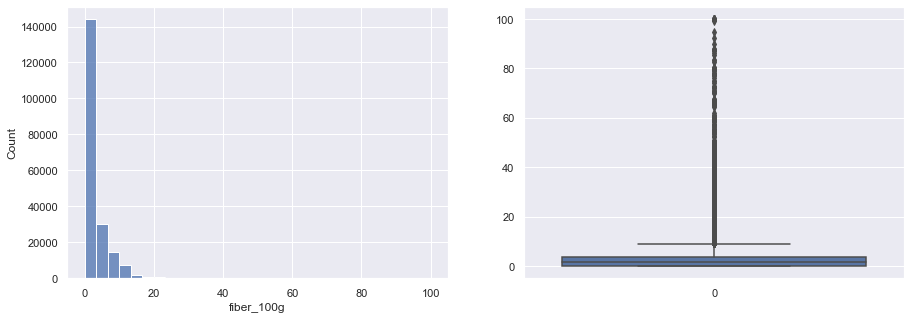

In [262]:
#Histogrammes de distribution et boxplots de 'fiber_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="fiber_100g", bins=30, ax=ax1)
sns.boxplot(data = data["fiber_100g"], ax=ax2)

<AxesSubplot:>

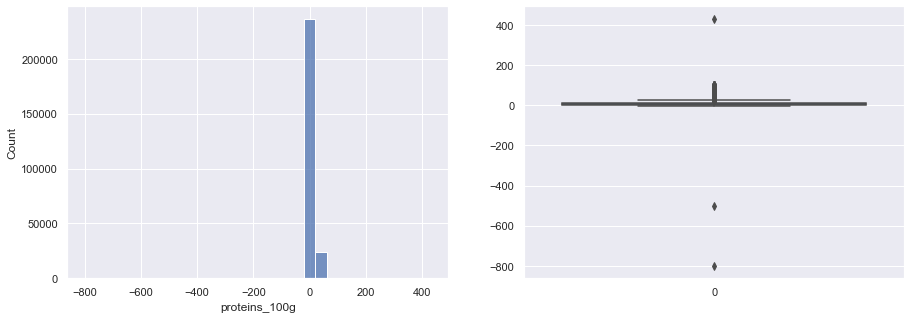

In [263]:
#Histogrammes de distribution et boxplots de 'proteins_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="proteins_100g", bins=30, ax=ax1)
sns.boxplot(data = data["proteins_100g"], ax=ax2)

In [264]:
print(data['proteins_100g'].describe())
print('Nomre de valeur manquante :',(data['proteins_100g'].isnull().sum()))

count    259823.000000
mean          7.076641
std           8.409363
min        -800.000000
25%           0.700000
50%           4.760000
75%          10.000000
max         430.000000
Name: proteins_100g, dtype: float64
Nomre de valeur manquante : 60815


In [265]:
#Suppression des outliers:
data.loc[data['proteins_100g']>100, 'proteins_100g'] = np.nan
data.loc[data['proteins_100g']<0, 'proteins_100g'] = np.nan

In [266]:
print(data['proteins_100g'].describe())
print('Nomre de valeur manquante :',(data['proteins_100g'].isnull().sum()))

count    259819.000000
mean          7.080112
std           8.156772
min           0.000000
25%           0.700000
50%           4.760000
75%          10.000000
max         100.000000
Name: proteins_100g, dtype: float64
Nomre de valeur manquante : 60819


<AxesSubplot:>

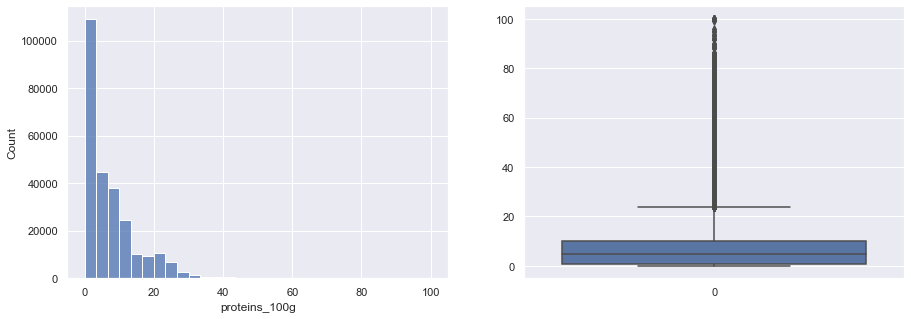

In [267]:
#Histogrammes de distribution et boxplots de 'proteins_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="proteins_100g", bins=30, ax=ax1)
sns.boxplot(data = data["proteins_100g"], ax=ax2)

<AxesSubplot:>

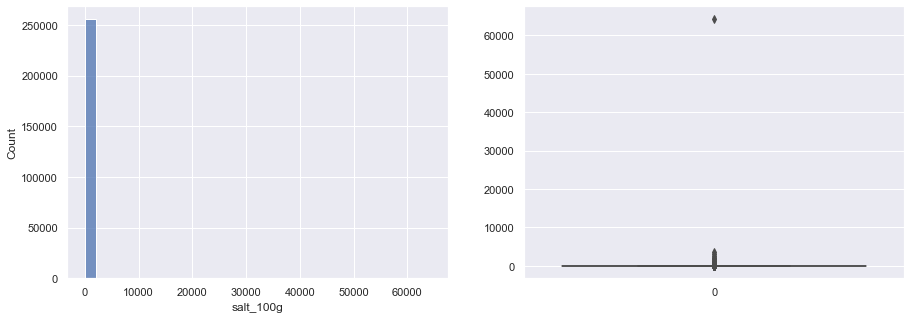

In [268]:
#Histogrammes de distribution et boxplots de 'salt_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="salt_100g", bins=30, ax=ax1)
sns.boxplot(data = data["salt_100g"], ax=ax2)

In [269]:
print(data['salt_100g'].describe())
print('Nomre de valeur manquante :',(data['salt_100g'].isnull().sum()))

count    255420.000000
mean          2.028589
std         128.292037
min           0.000000
25%           0.063500
50%           0.581660
75%           1.374140
max       64312.800000
Name: salt_100g, dtype: float64
Nomre de valeur manquante : 65218


In [270]:
#Suppression des outliers:
data.loc[data['salt_100g']>100, 'salt_100g'] = np.nan

In [271]:
print(data['salt_100g'].describe())
print('Nomre de valeur manquante :',(data['salt_100g'].isnull().sum()))

count    255262.000000
mean          1.588307
std           6.243325
min           0.000000
25%           0.063500
50%           0.580000
75%           1.371600
max         100.000000
Name: salt_100g, dtype: float64
Nomre de valeur manquante : 65376


<AxesSubplot:>

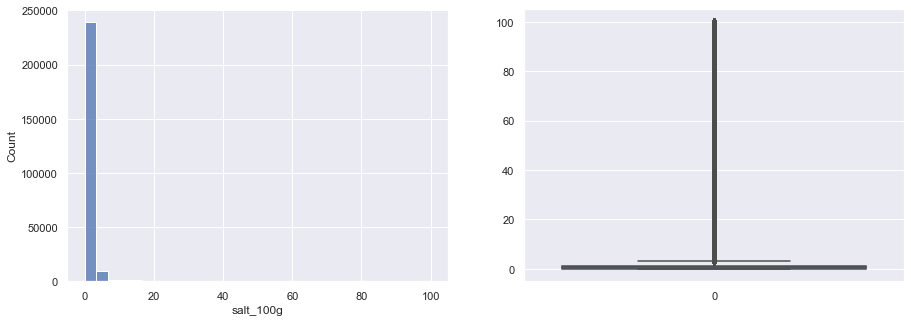

In [272]:
#Histogrammes de distribution et boxplots de 'salt_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="salt_100g", bins=30, ax=ax1)
sns.boxplot(data = data["salt_100g"], ax=ax2)

<AxesSubplot:>

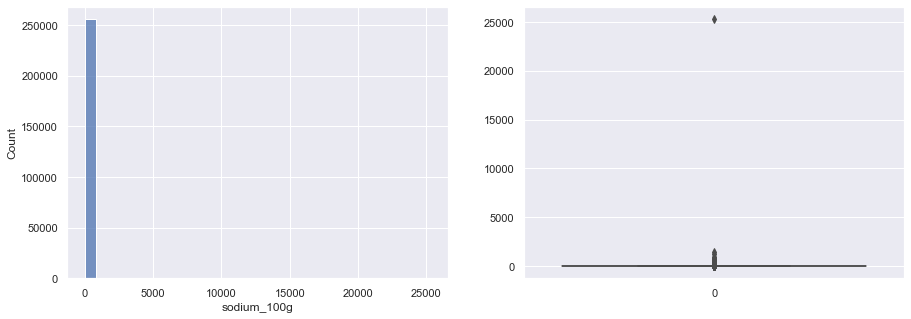

In [273]:
#Histogrammes de distribution et boxplots de 'sodium_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="sodium_100g", bins=30, ax=ax1)
sns.boxplot(data = data["sodium_100g"], ax=ax2)

In [274]:
print(data['sodium_100g'].describe())
print('Nomre de valeur manquante :',(data['sodium_100g'].isnull().sum()))

count    255373.000000
mean          0.798802
std          50.513321
min           0.000000
25%           0.025000
50%           0.229000
75%           0.541000
max       25320.000000
Name: sodium_100g, dtype: float64
Nomre de valeur manquante : 65265


In [275]:
#Suppression des outliers:
data.loc[data['sodium_100g']>100, 'sodium_100g'] = np.nan

In [276]:
print(data['sodium_100g'].describe())
print('Nomre de valeur manquante :',(data['sodium_100g'].isnull().sum()))

count    255339.000000
mean          0.647077
std           2.656700
min           0.000000
25%           0.025000
50%           0.229000
75%           0.541000
max         100.000000
Name: sodium_100g, dtype: float64
Nomre de valeur manquante : 65299


<AxesSubplot:>

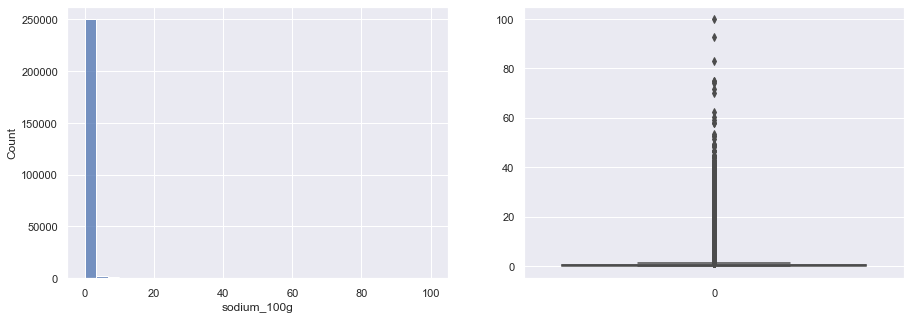

In [277]:
#Histogrammes de distribution et boxplots de 'sodium_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="sodium_100g", bins=30, ax=ax1)
sns.boxplot(data = data["sodium_100g"], ax=ax2)

<AxesSubplot:>

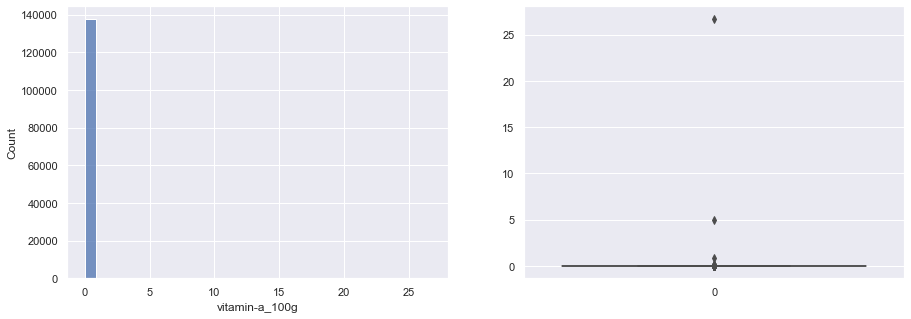

In [278]:
#Histogrammes de distribution et boxplots de 'vitamin-a_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="vitamin-a_100g", bins=30, ax=ax1)
sns.boxplot(data = data["vitamin-a_100g"], ax=ax2)

In [279]:
print(data['vitamin-a_100g'].describe())
print('Nomre de valeur manquante :',(data['vitamin-a_100g'].isnull().sum()))

count    137494.000000
mean          0.000397
std           0.073294
min          -0.000340
25%           0.000000
50%           0.000000
75%           0.000107
max          26.700000
Name: vitamin-a_100g, dtype: float64
Nomre de valeur manquante : 183144


In [280]:
#Suppression des outliers:
data.loc[data['vitamin-a_100g']>0.5, 'vitamin-a_100g'] = np.nan
data.loc[data['vitamin-a_100g']<0, 'vitamin-a_100g'] = np.nan

In [281]:
print(data['vitamin-a_100g'].describe())
print('Nomre de valeur manquante :',(data['vitamin-a_100g'].isnull().sum()))

count    137490.000000
mean          0.000160
std           0.000901
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000107
max           0.120000
Name: vitamin-a_100g, dtype: float64
Nomre de valeur manquante : 183148


<AxesSubplot:>

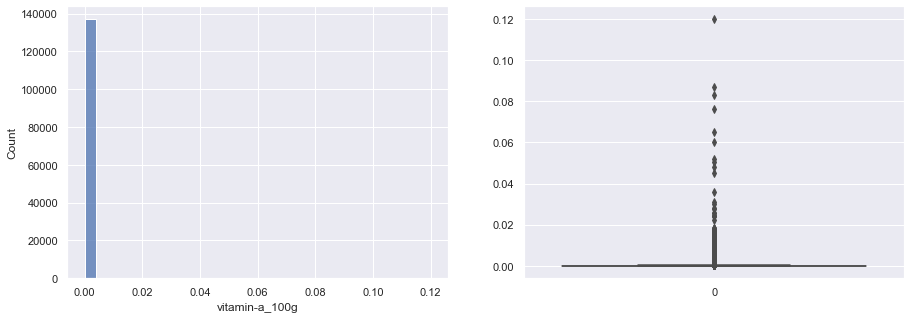

In [282]:
#Histogrammes de distribution et boxplots de 'vitamin-a_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="vitamin-a_100g", bins=30, ax=ax1)
sns.boxplot(data = data["vitamin-a_100g"], ax=ax2)

<AxesSubplot:>

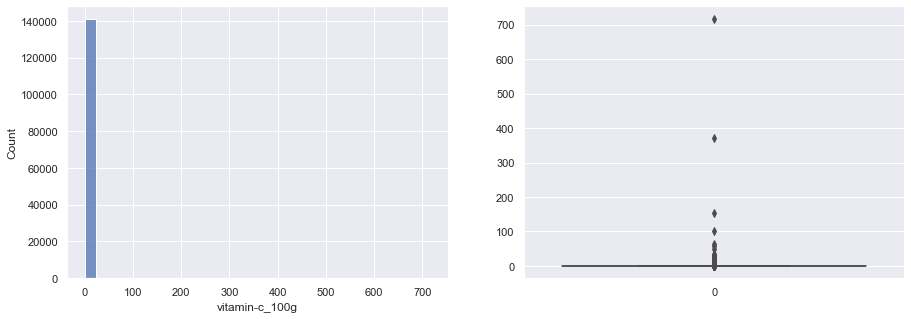

In [283]:
#Histogrammes de distribution et boxplots de 'vitamin-c_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="vitamin-c_100g", bins=30, ax=ax1)
sns.boxplot(data = data["vitamin-c_100g"], ax=ax2)

In [284]:
print(data['vitamin-c_100g'].describe())
print('Nomre de valeur manquante :',(data['vitamin-c_100g'].isnull().sum()))

count    140802.000000
mean          0.023377
std           2.236967
min          -0.002100
25%           0.000000
50%           0.000000
75%           0.003700
max         716.981100
Name: vitamin-c_100g, dtype: float64
Nomre de valeur manquante : 179836


In [285]:
#Suppression des outliers:
data.loc[data['vitamin-c_100g']>100, 'vitamin-c_100g'] = np.nan
data.loc[data['vitamin-c_100g']<0, 'vitamin-c_100g'] = np.nan

In [286]:
print(data['vitamin-c_100g'].describe())
print('Nomre de valeur manquante :',(data['vitamin-c_100g'].isnull().sum()))

count    140798.000000
mean          0.014568
std           0.461529
min           0.000000
25%           0.000000
50%           0.000000
75%           0.003700
max         100.000000
Name: vitamin-c_100g, dtype: float64
Nomre de valeur manquante : 179840


<AxesSubplot:>

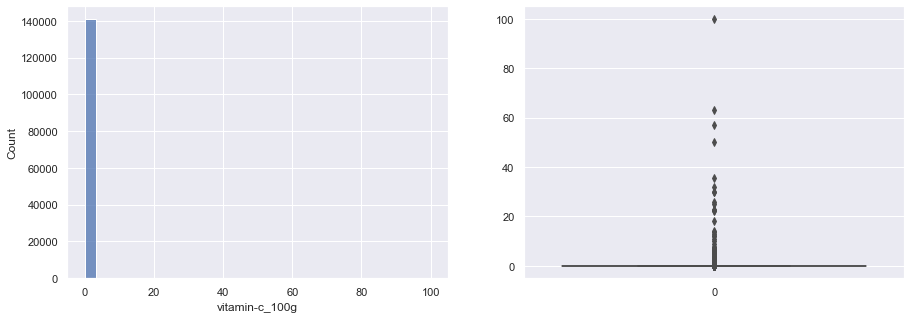

In [287]:
#Histogrammes de distribution et boxplots de 'vitamin-c_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="vitamin-c_100g", bins=30, ax=ax1)
sns.boxplot(data = data["vitamin-c_100g"], ax=ax2)

<AxesSubplot:>

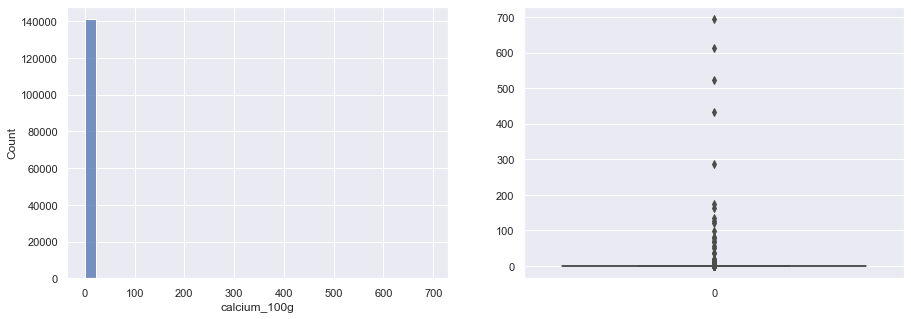

In [288]:
#Histogrammes de distribution et boxplots de 'calcium_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="calcium_100g", bins=30, ax=ax1)
sns.boxplot(data = data["calcium_100g"], ax=ax2)

In [289]:
print(data['calcium_100g'].describe())
print('Nomre de valeur manquante :',(data['calcium_100g'].isnull().sum()))

count    140989.000000
mean          0.125192
std           3.318980
min           0.000000
25%           0.000000
50%           0.035000
75%           0.106000
max         694.737000
Name: calcium_100g, dtype: float64
Nomre de valeur manquante : 179649


In [290]:
#Suppression des outliers:
data.loc[data['calcium_100g']>100, 'calcium_100g'] = np.nan

In [291]:
print(data['calcium_100g'].describe())
print('Nomre de valeur manquante :',(data['calcium_100g'].isnull().sum()))

count    140979.000000
mean          0.102042
std           0.585409
min           0.000000
25%           0.000000
50%           0.035000
75%           0.106000
max          99.006000
Name: calcium_100g, dtype: float64
Nomre de valeur manquante : 179659


<AxesSubplot:>

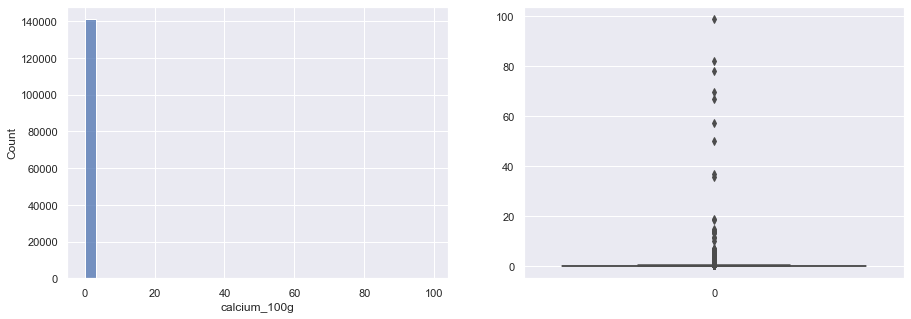

In [292]:
#Histogrammes de distribution et boxplots de 'calcium_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="calcium_100g", bins=30, ax=ax1)
sns.boxplot(data = data["calcium_100g"], ax=ax2)

<AxesSubplot:>

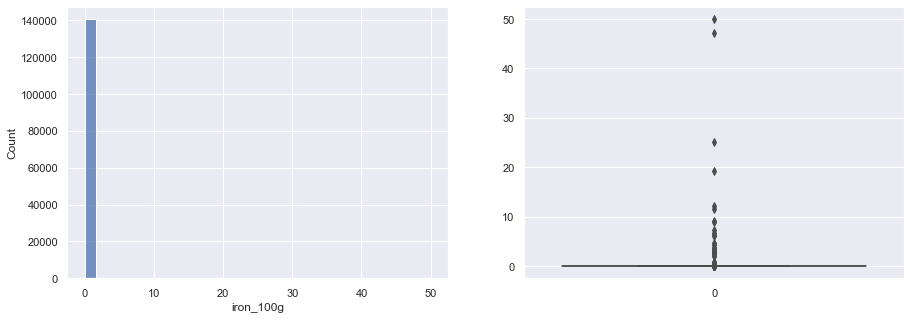

In [293]:
#Histogrammes de distribution et boxplots de 'iron_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="iron_100g", bins=30, ax=ax1)
sns.boxplot(data = data["iron_100g"], ax=ax2)

In [294]:
print(data['iron_100g'].describe())
print('Nomre de valeur manquante :',(data['iron_100g'].isnull().sum()))

count    140400.000000
mean          0.003653
std           0.214455
min          -0.000260
25%           0.000000
50%           0.001010
75%           0.002400
max          50.000000
Name: iron_100g, dtype: float64
Nomre de valeur manquante : 180238


In [295]:
#Suppression des outliers:
data.loc[data['iron_100g']>32, 'iron_100g'] = np.nan
data.loc[data['iron_100g']<0, 'iron_100g'] = np.nan

In [296]:
print(data['iron_100g'].describe())
print('Nomre de valeur manquante :',(data['iron_100g'].isnull().sum()))

count    140397.000000
mean          0.002962
std           0.111429
min           0.000000
25%           0.000000
50%           0.001010
75%           0.002400
max          25.000000
Name: iron_100g, dtype: float64
Nomre de valeur manquante : 180241


<AxesSubplot:>

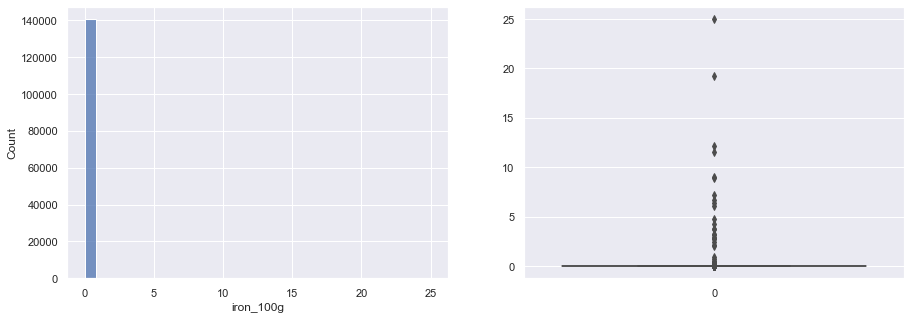

In [297]:
#Histogrammes de distribution et boxplots de 'iron_100g'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="iron_100g", bins=30, ax=ax1)
sns.boxplot(data = data["iron_100g"], ax=ax2)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320638 entries, 0 to 320771
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  248850 non-null  float64
 1   ingredients_from_palm_oil_n  248850 non-null  float64
 2   nutrition_grade_fr           221147 non-null  object 
 3   pnns_groups_1                91498 non-null   object 
 4   energy_100g                  261028 non-null  float64
 5   fat_100g                     243799 non-null  float64
 6   saturated-fat_100g           229483 non-null  float64
 7   trans-fat_100g               143236 non-null  float64
 8   cholesterol_100g             144032 non-null  float64
 9   carbohydrates_100g           243481 non-null  float64
 10  sugars_100g                  244876 non-null  float64
 11  fiber_100g                   200814 non-null  float64
 12  proteins_100g                259819 non-null  float64
 13 

## Ajout des informations relatives à l'empreinte carbonne issues de la littérature 

In [299]:
dic_carbonne = {'unknown': float('nan'), 'Fruits and vegetables':0.8, 'Sugary snacks':7.6, 'Cereals and potatoes':1.6,
                'Composite foods':3, 'Fish Meat Eggs': 17.5, 'Beverages':6.3, 'Fat and sauces':5.4, 
               'Milk and dairy products':12, 'Salty snacks': float('nan')}

In [300]:
print(data.shape)

(320638, 20)


In [301]:
data['empreinte_carbonne'] = data['pnns_groups_1'].apply(lambda pnn:dic_carbonne[pnn] if pnn in dic_carbonne
                                                         else float('nan'))

In [302]:
print(data.shape)

(320638, 21)


<AxesSubplot:>

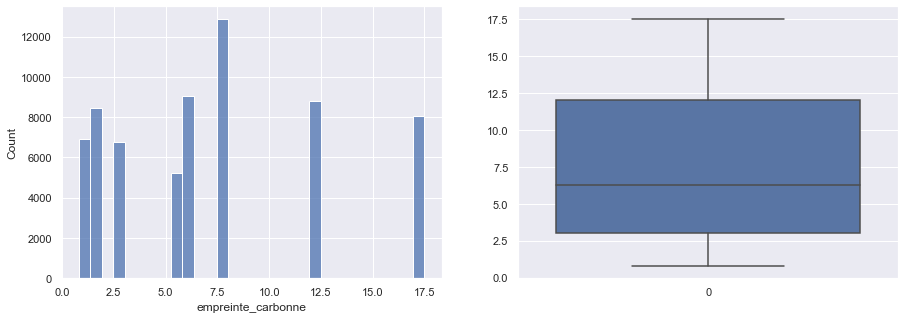

In [303]:
#Histogrammes de distribution et boxplots de 'empreinte_carbonne'
sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x="empreinte_carbonne", bins=30, ax=ax1)
sns.boxplot(data = data["empreinte_carbonne"], ax=ax2)

In [304]:
data['empreinte_carbonne'].describe()

count    66066.000000
mean         7.093892
std          5.144413
min          0.800000
25%          3.000000
50%          6.300000
75%         12.000000
max         17.500000
Name: empreinte_carbonne, dtype: float64

In [305]:
round(data['empreinte_carbonne'].isna().mean(),2)

0.79

In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320638 entries, 0 to 320771
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  248850 non-null  float64
 1   ingredients_from_palm_oil_n  248850 non-null  float64
 2   nutrition_grade_fr           221147 non-null  object 
 3   pnns_groups_1                91498 non-null   object 
 4   energy_100g                  261028 non-null  float64
 5   fat_100g                     243799 non-null  float64
 6   saturated-fat_100g           229483 non-null  float64
 7   trans-fat_100g               143236 non-null  float64
 8   cholesterol_100g             144032 non-null  float64
 9   carbohydrates_100g           243481 non-null  float64
 10  sugars_100g                  244876 non-null  float64
 11  fiber_100g                   200814 non-null  float64
 12  proteins_100g                259819 non-null  float64
 13 

## Imputation des valeurs manquantes 

### Imputation des valeurs manquantes des variables quantitatives par KNN

In [307]:
data_qut = data.drop(['nutrition_grade_fr','pnns_groups_1'],axis=1)
print(data_qut.shape)

(320638, 19)


In [308]:
imputer = KNNImputer(n_neighbors=1)

In [309]:
data_qut_imput = imputer.fit_transform(data_qut)

In [310]:
data_qut_imput =pd.DataFrame(data_qut_imput, columns=data_qut.columns)

In [311]:
data_qut_imput.isna().mean()

additives_n                    0.0
ingredients_from_palm_oil_n    0.0
energy_100g                    0.0
fat_100g                       0.0
saturated-fat_100g             0.0
trans-fat_100g                 0.0
cholesterol_100g               0.0
carbohydrates_100g             0.0
sugars_100g                    0.0
fiber_100g                     0.0
proteins_100g                  0.0
salt_100g                      0.0
sodium_100g                    0.0
vitamin-a_100g                 0.0
vitamin-c_100g                 0.0
calcium_100g                   0.0
iron_100g                      0.0
nutrition-score-fr_100g        0.0
empreinte_carbonne             0.0
dtype: float64

In [312]:
print(data_qut_imput.shape)
data_qut_imput['pnns_groups_1'] = data['pnns_groups_1']
print(data_qut_imput.shape)

(320638, 19)
(320638, 20)


In [313]:
print(data_qut_imput.shape)
data_qut_imput['nutrition_grade_fr'] = data['nutrition_grade_fr']
print(data_qut_imput.shape)

(320638, 20)
(320638, 21)


In [314]:
data_imput = data_qut_imput

In [315]:
data_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  320638 non-null  float64
 1   ingredients_from_palm_oil_n  320638 non-null  float64
 2   energy_100g                  320638 non-null  float64
 3   fat_100g                     320638 non-null  float64
 4   saturated-fat_100g           320638 non-null  float64
 5   trans-fat_100g               320638 non-null  float64
 6   cholesterol_100g             320638 non-null  float64
 7   carbohydrates_100g           320638 non-null  float64
 8   sugars_100g                  320638 non-null  float64
 9   fiber_100g                   320638 non-null  float64
 10  proteins_100g                320638 non-null  float64
 11  salt_100g                    320638 non-null  float64
 12  sodium_100g                  320638 non-null  float64
 13 

In [316]:
data_imput.isna().mean()

additives_n                    0.000000
ingredients_from_palm_oil_n    0.000000
energy_100g                    0.000000
fat_100g                       0.000000
saturated-fat_100g             0.000000
trans-fat_100g                 0.000000
cholesterol_100g               0.000000
carbohydrates_100g             0.000000
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
sodium_100g                    0.000000
vitamin-a_100g                 0.000000
vitamin-c_100g                 0.000000
calcium_100g                   0.000000
iron_100g                      0.000000
nutrition-score-fr_100g        0.000000
empreinte_carbonne             0.000000
pnns_groups_1                  0.714778
nutrition_grade_fr             0.310391
dtype: float64

In [317]:
data_imput.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,empreinte_carbonne
count,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000
mean,1.949150,0.018080,1167.974746,13.161275,5.327954,0.152334,0.015708,32.799354,15.816072,2.650886,7.108403,2.198025,0.974966,0.000273,3.095249,0.350529,0.002562,8.280845,7.048634
std,2.398557,0.125467,1134.467107,16.316780,8.018186,1.495946,0.244566,27.201137,19.646652,4.716724,7.716258,9.818014,4.440750,0.001640,15.778886,1.756596,0.079149,8.301014,5.189959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.800000
25%,0.000000,0.000000,476.000000,0.400000,0.000000,0.000000,0.000000,7.610000,1.700000,0.000000,1.400000,0.071120,0.030000,0.000000,0.000000,0.000200,0.000005,0.000000,1.600000
50%,1.000000,0.000000,1129.497821,9.860000,2.500000,0.000000,0.000000,32.055657,9.680000,1.600000,6.000000,0.750000,0.298000,0.000072,0.005200,0.037000,0.000900,9.165365,6.300000
75%,3.000000,0.000000,1661.000000,19.050000,6.087500,0.000000,0.020077,57.140000,18.000000,3.100000,8.890000,1.588307,0.647077,0.000160,0.021400,0.102042,0.002962,14.000000,7.600000
max,31.000000,2.000000,231199.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.120000,100.000000,99.006000,25.000000,40.000000,17.500000


## Imputation des valeurs manquantes des variables qualitatives

In [318]:
def grade_score(score):
    if score <=-2 :
        grade = 'a'
    if -1<= score <=3 :
        grade = 'b'
    if 4<= score <=11 :
        grade = 'c'
    if 12<= score <=16 :
        grade = 'd'
    if score >=17 :
        grade = 'e'
    return grade

In [319]:
data_imput['new_grade'] = data_imput.apply(lambda r: grade_score(r['nutrition-score-fr_100g']) if 
                               type(r['nutrition_grade_fr']) == float else r['nutrition_grade_fr'], axis=1)

In [320]:
data_imput['new_grade']

0         c
1         d
2         b
3         d
4         b
         ..
320633    c
320634    b
320635    c
320636    c
320637    c
Name: new_grade, Length: 320638, dtype: object

In [321]:
(data_imput['new_grade'] == data_imput['nutrition_grade_fr']).sum()

221115

In [322]:
data_imput['nutrition_grade_fr'].notna().sum()

221115

In [323]:
data_imput.head()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,empreinte_carbonne,pnns_groups_1,nutrition_grade_fr,new_grade
0,1.935953,0.019666,1129.497821,12.725386,5.125686,0.067193,0.020077,32.055657,15.985992,2.832163,...,0.647077,0.00016,0.014568,0.102042,0.002962,9.165365,7.093892,NaN,NaN,c
1,0.000000,0.000000,2243.000000,28.570000,28.570000,0.000000,0.018000,64.290000,14.290000,3.600000,...,0.000000,0.00000,0.021400,0.000000,0.001290,14.000000,1.600000,NaN,d,d
2,0.000000,0.000000,1941.000000,17.860000,0.000000,0.000000,0.000000,60.710000,17.860000,7.100000,...,0.250000,0.00000,0.000000,0.071000,0.001290,0.000000,1.600000,NaN,b,b
3,0.000000,0.000000,2540.000000,57.140000,5.360000,0.000000,0.000000,17.860000,3.570000,7.100000,...,0.482000,0.00013,0.017000,0.143000,0.005140,12.000000,1.600000,NaN,d,d
4,0.000000,0.000000,1552.000000,1.430000,2.100000,0.000000,0.000000,77.140000,0.180000,5.700000,...,44.167000,0.00013,0.017000,0.006000,0.007000,0.000000,6.300000,NaN,NaN,b


[Text(0.5, 1.0, "Représentation graphique des effectifs par catégorie pour la variable 'new_grade'"),
 Text(0.5, 0, 'effectifs'),
 Text(0, 0.5, 'catégories')]

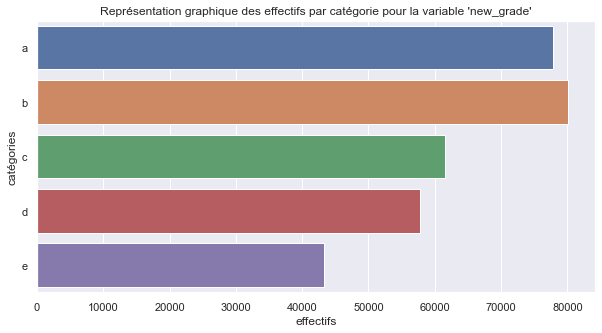

In [324]:
#Représentation graphique des effectifs par catégorie

count_new_grade = count(data_imput['new_grade'])

sns.set(rc = {'figure.figsize':(10,5)})
categories = list(count_new_grade.keys())
categories = sorted(categories)
effectifs = list(count_new_grade.values())
fig = sns.barplot(x=effectifs, y=categories,orient="h")
fig.set(title ="Représentation graphique des effectifs par catégorie pour la variable 'new_grade'",
        xlabel="effectifs", ylabel="catégories")

In [325]:
#Je vérifie que le taux de valeurs manquantes est bien nul :
data_imput.isna().mean()

additives_n                    0.000000
ingredients_from_palm_oil_n    0.000000
energy_100g                    0.000000
fat_100g                       0.000000
saturated-fat_100g             0.000000
trans-fat_100g                 0.000000
cholesterol_100g               0.000000
carbohydrates_100g             0.000000
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
sodium_100g                    0.000000
vitamin-a_100g                 0.000000
vitamin-c_100g                 0.000000
calcium_100g                   0.000000
iron_100g                      0.000000
nutrition-score-fr_100g        0.000000
empreinte_carbonne             0.000000
pnns_groups_1                  0.714778
nutrition_grade_fr             0.310391
new_grade                      0.000000
dtype: float64

## Création du carbonne-score à partir de la variable 'empreinte_carbonne'

In [326]:
def carbonne_score(score_carb):
    if score_carb <=2 :
        grade_carb = 'C1'
        return grade_carb
    if 2< score_carb <= 5 :
        grade_carb = 'C2'
        return grade_carb
    if 5< score_carb <=10 :
        grade_carb = 'C3'
        return grade_carb
    if 10< score_carb <=15 :
        grade_carb = 'C4'
        return grade_carb
    if score_carb >15 :
        grade_carb = 'C5'
        return grade_carb

In [327]:
data_imput['carbonne_grade'] = data_imput.apply(lambda r: carbonne_score(r['empreinte_carbonne']), axis=1)

In [328]:
data_imput['carbonne_grade'].describe()

count     320638
unique         5
top           C3
freq      164400
Name: carbonne_grade, dtype: object

In [329]:
data_imput.isna().mean()

additives_n                    0.000000
ingredients_from_palm_oil_n    0.000000
energy_100g                    0.000000
fat_100g                       0.000000
saturated-fat_100g             0.000000
trans-fat_100g                 0.000000
cholesterol_100g               0.000000
carbohydrates_100g             0.000000
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
sodium_100g                    0.000000
vitamin-a_100g                 0.000000
vitamin-c_100g                 0.000000
calcium_100g                   0.000000
iron_100g                      0.000000
nutrition-score-fr_100g        0.000000
empreinte_carbonne             0.000000
pnns_groups_1                  0.714778
nutrition_grade_fr             0.310391
new_grade                      0.000000
carbonne_grade                 0.000000
dtype: float64

[Text(0.5, 1.0, "Représentation graphique des effectifs par catégorie pour la variable 'carbonne_grade'"),
 Text(0.5, 0, 'effectifs'),
 Text(0, 0.5, 'catégories')]

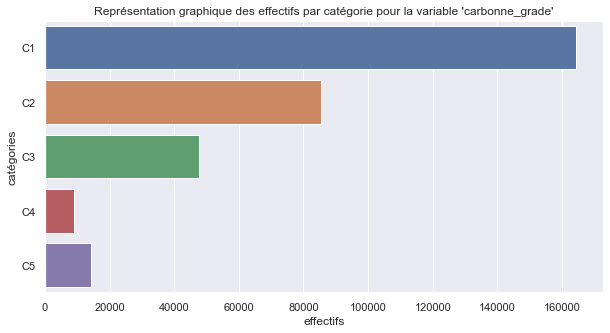

In [330]:
#Représentation graphique des effectifs par catégorie

count_carbonne_grade = count(data_imput['carbonne_grade'])

sns.set(rc = {'figure.figsize':(10,5)})
categories = list(count_carbonne_grade.keys())
categories = sorted(categories)
effectifs = list(count_carbonne_grade.values())
fig = sns.barplot(x=effectifs, y=categories,orient="h")
fig.set(title ="Représentation graphique des effectifs par catégorie pour la variable 'carbonne_grade'",
        xlabel="effectifs", ylabel="catégories")

In [331]:
data_imput.describe()

,additives_n,ingredients_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,empreinte_carbonne
count,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000,320638.000000
mean,1.949150,0.018080,1167.974746,13.161275,5.327954,0.152334,0.015708,32.799354,15.816072,2.650886,7.108403,2.198025,0.974966,0.000273,3.095249,0.350529,0.002562,8.280845,7.048634
std,2.398557,0.125467,1134.467107,16.316780,8.018186,1.495946,0.244566,27.201137,19.646652,4.716724,7.716258,9.818014,4.440750,0.001640,15.778886,1.756596,0.079149,8.301014,5.189959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.800000
25%,0.000000,0.000000,476.000000,0.400000,0.000000,0.000000,0.000000,7.610000,1.700000,0.000000,1.400000,0.071120,0.030000,0.000000,0.000000,0.000200,0.000005,0.000000,1.600000
50%,1.000000,0.000000,1129.497821,9.860000,2.500000,0.000000,0.000000,32.055657,9.680000,1.600000,6.000000,0.750000,0.298000,0.000072,0.005200,0.037000,0.000900,9.165365,6.300000
75%,3.000000,0.000000,1661.000000,19.050000,6.087500,0.000000,0.020077,57.140000,18.000000,3.100000,8.890000,1.588307,0.647077,0.000160,0.021400,0.102042,0.002962,14.000000,7.600000
max,31.000000,2.000000,231199.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.120000,100.000000,99.006000,25.000000,40.000000,17.500000


In [332]:
data_imput.shape

(320638, 23)

In [333]:
data_imput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  320638 non-null  float64
 1   ingredients_from_palm_oil_n  320638 non-null  float64
 2   energy_100g                  320638 non-null  float64
 3   fat_100g                     320638 non-null  float64
 4   saturated-fat_100g           320638 non-null  float64
 5   trans-fat_100g               320638 non-null  float64
 6   cholesterol_100g             320638 non-null  float64
 7   carbohydrates_100g           320638 non-null  float64
 8   sugars_100g                  320638 non-null  float64
 9   fiber_100g                   320638 non-null  float64
 10  proteins_100g                320638 non-null  float64
 11  salt_100g                    320638 non-null  float64
 12  sodium_100g                  320638 non-null  float64
 13 

In [340]:
#Mise à jour du nom de certaines variables :

data_imput.rename(columns={'carbonne_grade': 'carbone_grade', 
                           'new_grade': 'nutrition_grade',
                          'empreinte_carbonne': 'empreinte_carbone'}, inplace=True)

print(data_imput.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320638 entries, 0 to 320637
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  320638 non-null  float64
 1   ingredients_from_palm_oil_n  320638 non-null  float64
 2   energy_100g                  320638 non-null  float64
 3   fat_100g                     320638 non-null  float64
 4   saturated-fat_100g           320638 non-null  float64
 5   trans-fat_100g               320638 non-null  float64
 6   cholesterol_100g             320638 non-null  float64
 7   carbohydrates_100g           320638 non-null  float64
 8   sugars_100g                  320638 non-null  float64
 9   fiber_100g                   320638 non-null  float64
 10  proteins_100g                320638 non-null  float64
 11  salt_100g                    320638 non-null  float64
 12  sodium_100g                  320638 non-null  float64
 13 

## Exportation du fichier de données nettoyé

In [341]:
data_imput.to_csv ('data_nett.csv', index = False, header=True)